<a href="https://colab.research.google.com/github/kapibara3chi/LSTM_test/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.pip

In [ ]:
!pip install keras
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install yfinance
!pip install optuna tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 9.7 MB/s eta 0:00:00


# Ref code

出来高を考慮した予測

始値、安値、高値を考慮した予測

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-01-02  44.730000  45.189999  44.500000  45.189999  43.365040  1826300
2018-01-03  45.270000  46.090000  45.250000  45.990002  44.132736  2150800
2018-01-04  46.380001  46.869999  46.320000  46.570000  44.689312  2632000
2018-01-05  47.029999  47.560001  46.740002  47.450001  45.533768  1928900
2018-01-08  47.419998  47.820000  47.250000  47.740002  45.812069  1992500
scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data 
[[0.21874023]
 [0.22460143]
 [0.23296342]
 ...
 [0.76844323]
 [0.74265395]
 [0.75070333]]
training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len 
1269
train_data.shapetrain_data.shapetrain_data.shapetrain_data.shapetrain_data.sha

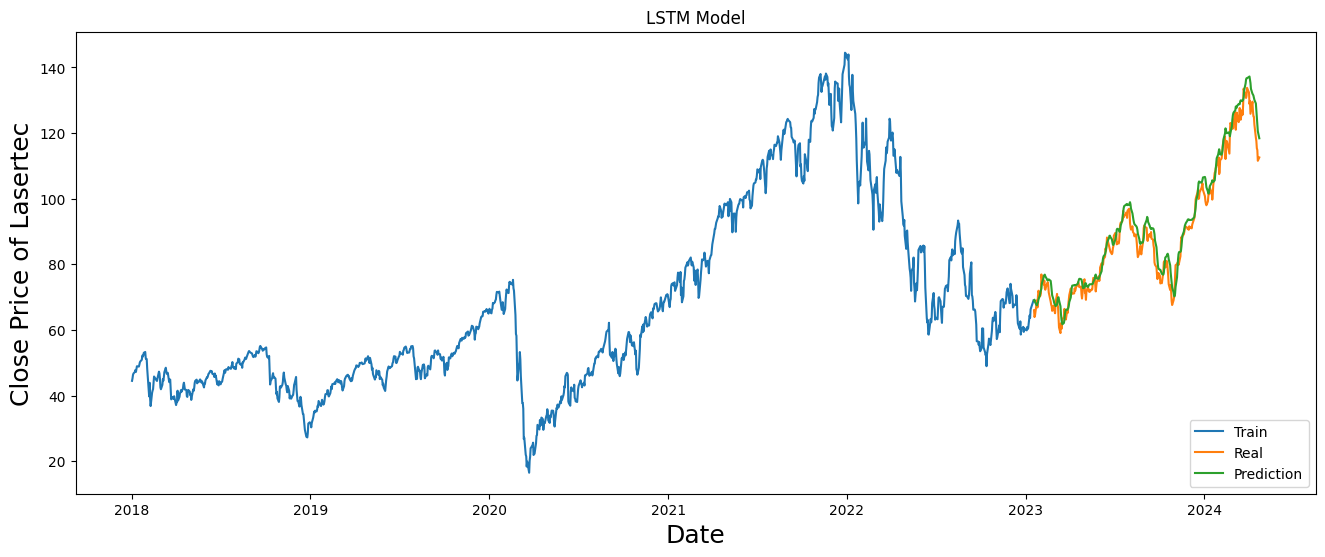

In [ ]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SOXL",start='2018-01-01',end = datetime.now(),interval="1d")
print(df.head())

#　Closeコラムのみ抽出
data = df.filter(["Low"])
dataset = data.values
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print("scaled_data "*10)
print(scaled_data)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))
print("training_data_len "*10)
print(training_data_len)

train_data = scaled_data[0: int(training_data_len), :]
print("train_data.shape"*10)
print(train_data.shape)

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
print("x_train.shape"*10)
print(x_train.shape)


# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 1, epochs =1)

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i,0])
y_test = dataset[training_data_len:, :]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

# 予測値の算出
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
test_score = np.sqrt(mean_squared_error(y_test,predictions))
print('Test Score: %.2f RMSE' % (test_score))

train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price of Lasertec', fontsize =18)
plt.plot(train['Low'])
plt.plot(valid[['Low','Predictions']])
plt.legend(['Train','Real','Prediction'], loc='lower right')
plt.show()

# RMSE算出のテストデータと予測データの日付修正、予測値のグラフを1日シフトし日付を修正

[*********************100%%**********************]  1 of 1 completed


df:(80, 6)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  101.879997  102.839996  100.760002  102.120003  101.803108   
2024-01-03  100.699997  101.199997   99.250000   99.629997   99.320831   
2024-01-04   99.269997  100.930000   98.440002   98.629997   98.323936   
2024-01-05   98.650002  100.550003   98.000000   98.930000   98.623009   
2024-01-08   99.220001  103.230003   99.150002  103.099998  102.780067   

              Volume  
Date                  
2024-01-02   8732800  
2024-01-03  11632600  
2024-01-04   7422300  
2024-01-05  10963500  
2024-01-08   8596400  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-19  115.379997  116.099998  111.540001  112.550003  112.550003   
2024-04-22  114.209999  117.309998  112.570000  115.449997  115.449997   
2024-04-23  1

1/1 [==============================] - 1s 757ms/step
prediction shape(16, 1)
len predictions:16
[[145.73607]
 [146.01422]
 [146.23633]
 [146.40443]
 [146.54367]
 [146.56143]
 [146.56439]
 [146.40858]
 [146.02823]
 [145.46434]
 [144.70938]
 [143.80174]
 [142.71661]
 [141.59346]
 [140.56313]
 [139.62273]]
次の日の予測株価: 139.6227264404297
Test Score: 24.00 RMSE
valid add predictions*********************************:16
                 Close  Predictions
Date                               
2024-04-19  112.550003   143.801743
2024-04-22  115.449997   142.716614
2024-04-23  119.510002   141.593460
2024-04-24  119.349998   140.563126
2024-04-25  117.839996   139.622726
            Predictions
2024-04-22   143.801743
2024-04-23   142.716614
2024-04-24   141.593460
2024-04-25   140.563126
2024-04-26   139.622726


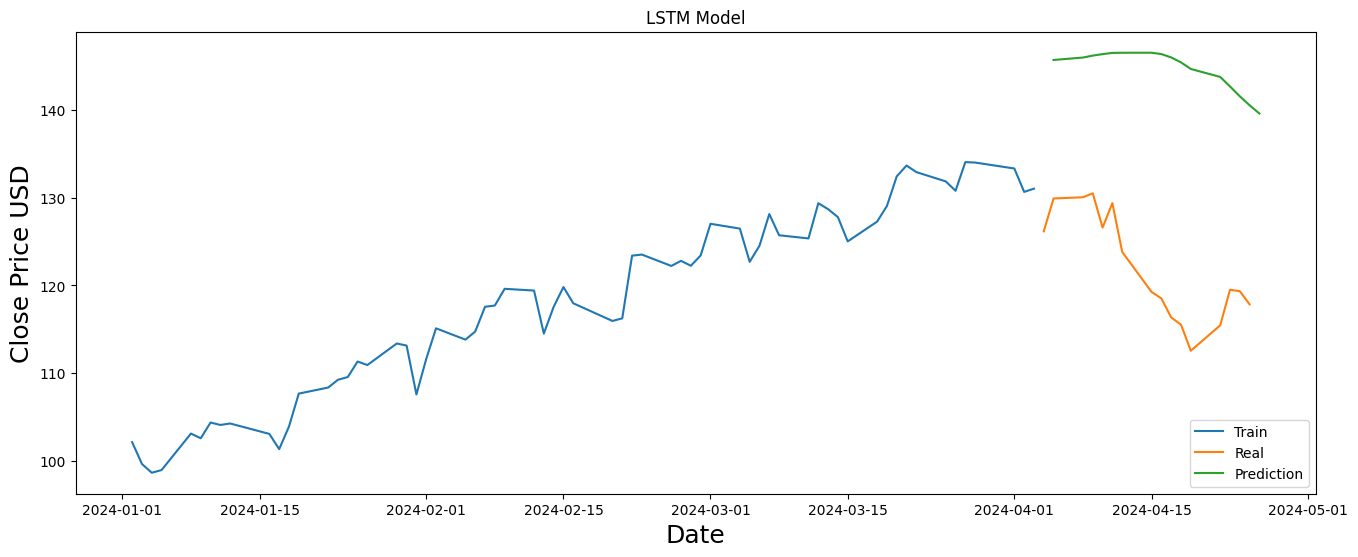

In [ ]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2024-01-01',end = datetime.now(),interval="1d")
print(f'df:{df.shape}')
print(df.head())
print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(["Close"])
dataset = data.values
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))

train_data = scaled_data[0: int(training_data_len), :]
# print(f'train_data.shape:{train_data.shape}')

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
# print(f'x_train.shape:{x_train.shape}')


# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 1, epochs =1)

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i,0])
y_test = dataset[training_data_len:, :]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
# print(f'len x_test:{x_test.shape}')
# print(x_test[0])
# 予測値の算出
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# print(f'prediction shape{predictions.shape}')
# print(f'len predictions:{len(predictions)}')
# print(predictions)
print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
### predictionsの最後のデータはy_testと対応しないので削除
predictions_adjusted = predictions[:-1]
# print(f'predictions_adjusted:{len(predictions_adjusted)}')
# print(predictions_adjusted)
# 予測値を含む新しいDataFrameを作成

# y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
y_test_shifted = y_test[1:]

test_score = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
print('Test Score: %.2f RMSE' % (test_score))
# print(f'y_test*********************************:{len(y_test)}')
# print(y_test)
# print(f'predictions*********************************:{len(predictions)}')
# print(predictions)


train = data[: training_data_len]
# print(f'train*********************************:{len(train)}')
# print(train.tail())
valid = data[training_data_len:]
# print(f'valid*********************************:{len(valid)}')
# print(valid.tail())
# print(valid)
# validデータセットに予測値を追加
# valid['Predictions'] = predictions
# print("predictions*********************************")
# print(len(predictions))
# print(predictions)

# validデータセットに予測値を追加
valid['Predictions'] = predictions
print(f'valid add predictions*********************************:{len(valid)}')
print(valid.tail())
# 予測値の日付を1日進める
# print(f'prediction index*************')
next_day=valid.index[-1]+pd.DateOffset(days=1)
# print(f'new day:{next_day}')
predictions_index = valid.index.append(pd.Index([next_day]))
predictions_index=predictions_index[1:]
# print(predictions_index)
# print(f'prediction index len; {len(predictions_index)}')
# print(predictions_index)
# 予測値を含む新しいDataFrameを作成
predictions_df = pd.DataFrame(data=predictions, index=predictions_index, columns=['Predictions'])
print(predictions_df.tail())
# グラフ化
plt.figure(figsize = (16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price USD', fontsize =18)
plt.plot(train['Close'])
# plt.plot(valid['Close'],marker='o')
plt.plot(valid['Close'])
plt.plot(predictions_df['Predictions'])
plt.legend(['Train','Real','Prediction'], loc='lower right')
plt.show()

# グラフ plotly化

In [ ]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2018-01-01',end = datetime.now(),interval="1d")
# print(f'df:{df.shape}')
# print(df.head())
# print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(["Close"])
dataset = data.values
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))
train_data = scaled_data[0: int(training_data_len), :]

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))


# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 1, epochs =1)

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i,0])
y_test = dataset[training_data_len:, :]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

# 予測値の算出
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
### predictionsの最後のデータはy_testと対応しないので削除
predictions_adjusted = predictions[:-1]
### y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
y_test_shifted = y_test[1:]
test_score = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
print('Test Score: %.2f RMSE' % (test_score))


train = data[: training_data_len]
valid = data[training_data_len:]

#予測データとvalidデータの日付を対応するよう修正
# validデータセットに予測値を追加
valid['Predictions'] = predictions
# 予測値の日付を1日進める
next_day=valid.index[-1]+pd.DateOffset(days=1)
predictions_index = valid.index.append(pd.Index([next_day]))
predictions_index=predictions_index[1:]
# 予測値を含む新しいDataFrameを作成
predictions_df = pd.DataFrame(data=predictions, index=predictions_index, columns=['Predictions'])

# グラフ化
import plotly.graph_objs as go

# 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

# データをリストにまとめる
data = [train_trace, valid_trace, predictions_trace]

# レイアウトを定義
layout = go.Layout(
    title='LSTM Model',
    xaxis={'title': 'Date'},
    yaxis={'title': 'Close Price USD'},
    hovermode='closest'
)

# フィギュアを定義し、データとレイアウトを組み合わせる
fig = go.Figure(data=data, layout=layout)

# グラフを表示
fig.show()

[*********************100%%**********************]  1 of 1 completed


df:(1589, 6)
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-01-02  44.730000  45.189999  44.500000  45.189999  43.365036  1826300
2018-01-03  45.270000  46.090000  45.250000  45.990002  44.132736  2150800
2018-01-04  46.380001  46.869999  46.320000  46.570000  44.689312  2632000
2018-01-05  47.029999  47.560001  46.740002  47.450001  45.533772  1928900
2018-01-08  47.419998  47.820000  47.250000  47.740002  45.812057  1992500
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-19  115.379997  116.099998  111.540001  112.550003  112.550003   
2024-04-22  114.209999  117.309998  112.570000  115.449997  115.449997   
2024-04-23  116.879997  119.870003  116.500000  119.510002  119.510002   
2024-04-24  120.150002  120.720001  117.739998  119.349998  119.349998   
2024-04-25  114.79

# 終値以外のデータを考慮したモデル

In [ ]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2018-01-01',end = datetime.now(),interval="1d")
# print(f'df:{df.shape}')
# print(df.head())
# print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(['Open', 'High', 'Low', 'Close', 'Volume'])  # 複数の特徴量を選択
dataset = data.values

#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))
train_data = scaled_data[0: int(training_data_len), :]

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, :])  # すべての特徴量を含む
  y_train.append(train_data[i, 3])  # 'Close'の値のみをターゲットとして使用
# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], data.shape[1]))
print(f'x_train shape:{x_train.shape}')

# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 10, epochs =100)

#
# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,:])
  y_test = dataset[training_data_len:, 3]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], data.shape[1]))
print(f'x_test shape:{x_test.shape}')

# 予測値の算出
predictions = model.predict(x_test)
# 予測値の配列を拡張
predictions_extended = np.zeros((len(predictions), 5))
predictions_extended[:, 3] = predictions[:, 0]  # 'Close' 価格の予測値を4番目の列にセット
# スケール逆変換を適用
predictions_scaled = scaler.inverse_transform(predictions_extended)
# 'Close' 価格の予測値のみを取り出す
final_predictions = predictions_scaled[:, 3]
# print(f'final predictions:{final_predictions.shape}')
# print(final_predictions)
# predictions = scaler.inverse_transform(predictions)
# print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")
print(f"次の日の予測株価: {final_predictions[-1]}")

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
### predictionsの最後のデータはy_testと対応しないので削除
predictions_adjusted = final_predictions[:-1]
### y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
y_test_shifted = y_test[1:]
print(f'y test shifted shape:{y_test_shifted.shape}')
print(f'prediction_scaled:{predictions_scaled.shape}')
test_score = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
print('Test Score: %.2f RMSE' % (test_score))


train = data[: training_data_len]
valid = data[training_data_len:]

#予測データとvalidデータの日付を対応するよう修正
# validデータセットに予測値を追加
valid['Predictions'] = final_predictions
# 予測値の日付を1日進める
next_day=valid.index[-1]+pd.DateOffset(days=1)
predictions_index = valid.index.append(pd.Index([next_day]))
predictions_index=predictions_index[1:]
# 予測値を含む新しいDataFrameを作成
predictions_df = pd.DataFrame(data=final_predictions, index=predictions_index, columns=['Predictions'])

# グラフ化
import plotly.graph_objs as go

# 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

# データをリストにまとめる
data = [train_trace, valid_trace, predictions_trace]

# レイアウトを定義
layout = go.Layout(
    title='LSTM Model',
    xaxis={'title': 'Date'},
    yaxis={'title': 'Close Price USD'},
    hovermode='closest'
)

# フィギュアを定義し、データとレイアウトを組み合わせる
fig = go.Figure(data=data, layout=layout)

# グラフを表示
fig.show()

[*********************100%%**********************]  1 of 1 completed


x_train shape:(1216, 60, 5)
Epoch 1/100
122/122 [==============================] - 14s 59ms/step - loss: 0.0079
Epoch 2/100
122/122 [==============================] - 8s 66ms/step - loss: 0.0017
Epoch 3/100
122/122 [==============================] - 7s 57ms/step - loss: 0.0015
Epoch 4/100
122/122 [==============================] - 8s 66ms/step - loss: 0.0013
Epoch 5/100
122/122 [==============================] - 8s 69ms/step - loss: 0.0011
Epoch 6/100
122/122 [==============================] - 7s 58ms/step - loss: 0.0010
Epoch 7/100
122/122 [==============================] - 8s 66ms/step - loss: 0.0011
Epoch 8/100
122/122 [==============================] - 7s 58ms/step - loss: 8.7073e-04
Epoch 9/100
122/122 [==============================] - 8s 66ms/step - loss: 8.3680e-04
Epoch 10/100
122/122 [==============================] - 8s 66ms/step - loss: 7.1430e-04
Epoch 11/100
122/122 [==============================] - 7s 58ms/step - loss: 7.5698e-04
Epoch 12/100
122/122 [==================

SystemExit: 

# Optinaによる最適化

## スカラー値の予測コード

### pip

In [ ]:
!pip install optuna tensorflow
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.2 MB/s eta 0:00:00


### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler



# データセットの準備（ここでは合成データセットを使用）
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# データのスケーリング
scaler = StandardScaler()
# scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# プルーニングコールバックの作成
class PruningCallback(tf.keras.callbacks.Callback):
    def __init__(self, trial, pruner):
        self._trial = trial
        self._pruner = pruner
        self._reported_epoch = set()  # 重複報告を避けるために追加

    def on_epoch_end(self, epoch, logs=None):
        if epoch in self._reported_epoch:
            return  # 既に報告されたエポックはスキップ

        current_loss = logs.get('val_loss')
        self._trial.report(current_loss, epoch)
        self._reported_epoch.add(epoch)  # 報告したエポックを記録

        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.exceptions.TrialPruned(message)

# class PruningCallback(tf.keras.callbacks.Callback):
#     def __init__(self, trial, pruner):
#         self._trial = trial
#         self._pruner = pruner

#     def on_epoch_end(self, epoch, logs=None):
#         # 現在のエポックの損失を報告
#         current_loss = logs.get('val_loss')
#         self._trial.report(current_loss, epoch)

#         # 他のトライアルの結果を考慮して、プルーニングするかどうかを判断
#         if self._trial.should_prune():
#             message = "Trial was pruned at epoch {}.".format(epoch)
#             raise optuna.exceptions.TrialPruned(message)

class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definitinon(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definitinon(n_units_per_layer,optimizer_name,lr)

    # EarlyStoppingコールバックを作成
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

    # チェックポイントコールバックの設定 epoch中のmin lossのモデルを採用
    checkpoint = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True, verbose=0)

    # プルーニングコールバックのインスタンスを作成
    pruning_callback = PruningCallback(trial, optuna.pruners.MedianPruner())

    #同一パラメータでの最適モデルの選択
    num_runs=3
    best_model = None
    best_val_loss = float('inf')  # 初期値を無限大に設定
    for _ in range(num_runs):
      # モデルの訓練
      model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,
                batch_size=batch_size,callbacks=[early_stopping_callback,checkpoint,
                                                 pruning_callback], verbose=0)
      # model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,
      #           batch_size=batch_size,callbacks=[early_stopping_callback,checkpoint ], verbose=0)

      # 最良のモデルの評価
      model.load_weights('model.keras')
      loss = model.evaluate(X_test, y_test, verbose=0)
     # num_runs中の最も良いモデルを判定
      if loss < best_val_loss:
          best_val_loss = loss
          best_model = model
      # model.summary()
    # num_runs中の最も良いモデルを選択
    loss=best_val_loss
    model=best_model

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)

    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='./model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = './best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=20
    #最適化の再開(True)か新規最適化(False)
    resume_flag=False

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    storage_name = f"sqlite:///{study_name}.db"
    storage_path='./'+study_name+'.db'

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',pruner=optuna.pruners.MedianPruner()
      ,study_name=study_name, storage=storage_name,load_if_exists=True)
      # study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('./*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = './trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = './param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('./'+study_name+'.db'):
        os.remove(storage_path)
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    #最適モデル構築from trial最適化時のlossにはならない
    print("***loaded best model***")
    tm=TestModel()
    model=tm.build_model_from_trial(trial)
    batch_size=trial.params['batch_size']
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = './best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())

    # 予測値の生成
    y_pred = loaded_model.predict(X_test)

    # グラフ化
    import plotly.graph_objs as go

    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    valid_trace = go.Scatter(x=y_test, y=y_pred.flatten(), mode='markers', name='Real')

    # データをリストにまとめる
    data = [valid_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='y_pred - y_test',
        xaxis={'title': 'y_test'},
        yaxis={'title': 'y_pred'},
        hovermode='closest'
    )
    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()

# code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import InputLayer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler


import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys
# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import plotly.graph_objs as go


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2023-01-01',end = datetime.now(),interval="1d")
# print(f'df:{df.shape}')
# print(df.head())
# print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(['Open', 'High', 'Low', 'Close', 'Volume'])  # 複数の特徴量を選択
dataset = data.values
# dfの列数を取得
num_columns=data.shape[1]
# print(f'clmn number:{num_columns}')

# 目的変数の列番号を取得
y_column_name = 'Close'#input
y_column_number = data.columns.get_loc(y_column_name)

#　データの正規化
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.7))
train_data = scaled_data[0: int(training_data_len), :]
train = data[: training_data_len]
valid = data[training_data_len:]

#訓練データの取得
window_size = 60#input
x_train = []
y_train = []
for i in range(window_size, len(train_data)):
  x_train.append(train_data[i-window_size:i, :])  # すべての特徴量を含む
  y_train.append(train_data[i, y_column_number])  # 'Close'の値のみをターゲットとして使用
# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], data.shape[1]))
# print(f'x_train shape:{x_train.shape}')

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - window_size: , :]
x_test = []
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i-window_size:i,:])
  y_test = dataset[training_data_len:, y_column_number]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], data.shape[1]))
# print(f'x_test shape:{x_test.shape}')



#LSTMモデル構築
def model_definition(lstm_units,dense_units,optimizer_name,lr):
    model = Sequential()
    model.add(InputLayer(input_shape=(x_train.shape[1], x_train.shape[2])))

    #LSTM層の定義
    for i,n_lstm in enumerate(lstm_units):
        if i==len(lstm_units)-1:
            model.add(LSTM(n_lstm,return_sequences=False))
        else:
            model.add(LSTM(n_lstm,return_sequences=True))
    #Dense層の定義
    for n_dense in dense_units:
        model.add(Dense(n_dense))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mean_squared_error')


    # オプティマイザの設定
    if optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'Lion':
        optimizer = tf.keras.optimizers.Lion(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model




# プルーニングコールバックの作成
class PruningCallback(tf.keras.callbacks.Callback):
    def __init__(self, trial, pruner):
        self._trial = trial
        self._pruner = pruner
        self._reported_epoch = set()  # 重複報告を避けるために追加

    def on_epoch_end(self, epoch, logs=None):
        if epoch in self._reported_epoch:
            return  # 既に報告されたエポックはスキップ

        current_loss = logs.get('val_loss')
        self._trial.report(current_loss, epoch)
        self._reported_epoch.add(epoch)  # 報告したエポックを記録

        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.exceptions.TrialPruned(message)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definition_scalar(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(x_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers_lstm = trial.suggest_int('n_layers', 1, 3 )
    n_layers_dense = trial.suggest_int('n_layers', 1, 3 )
    lstm_units = [trial.suggest_int(f'n_units_layer_lstm{i}', 8, 128) for i in range(n_layers_lstm)]
    dense_units = [trial.suggest_int(f'n_units_layer_dense{i}', 8, 128) for i in range(n_layers_dense)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definition(lstm_units,dense_units,optimizer_name,lr)

    # EarlyStoppingコールバックを作成
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

    # チェックポイントコールバックの設定 epoch中のmin lossのモデルを採用
    checkpoint = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True, verbose=0)

    # プルーニングコールバックのインスタンスを作成
    pruning_callback = PruningCallback(trial, optuna.pruners.MedianPruner())

    #同一パラメータでの最適モデルの選択
    num_runs=3#input
    best_model = None
    best_val_loss = float('inf')  # 初期値を無限大に設定
    for _ in range(num_runs):
      # モデルの訓練
      model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,
                batch_size=batch_size,callbacks=[early_stopping_callback,checkpoint,
                                                 pruning_callback], verbose=0)

      #==========================lossの計算をメソッドにしたい
      # 予測値の算出
      predictions = model.predict(x_test)
      # print(f'predicions:{predictions}')
      # 予測値のスケール逆変換
      # 予測値の配列を拡張
      predictions_extended = np.zeros((len(predictions), num_columns))
      predictions_extended[:, y_column_number] = predictions[:, 0]  # 'Close' 価格の予測値を列にセット
      # スケール逆変換を適用
      predictions_scaled = scaler.inverse_transform(predictions_extended)
      # 'Close' 価格の予測値のみを取り出す
      final_predictions = predictions_scaled[:, y_column_number]
      # print(f'final predictions:{final_predictions.shape}')
      # print(final_predictions)
      # print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")
      print(f"次の日の予測株価: {final_predictions[-1]}")

      # RMSEを利用して予測精度を確認
      ## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
      ### predictionsの最後のデータはy_testと対応しないので削除
      predictions_adjusted = final_predictions[:-1]
      ### y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
      y_test_shifted = y_test[1:]
      # print(f'y test shifted shape:{y_test_shifted.shape}')
      # print(f'prediction_scaled:{predictions_scaled.shape}')
      loss = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
      print('Test Score: %.2f RMSE' % (loss))

      # loss = model.evaluate(x_test, y_test, verbose=0)

      # num_runs中の最も良いモデルを判定
      if loss < best_val_loss:
          best_val_loss = loss
          print(f'best run number:{_},best loss:{loss}')
          best_model = model
    # model.summary()
    # num_runs中の最も良いモデルを選択
    loss=best_val_loss
    model=best_model

    # トライアル中の最終損失の計算
    print(f'final loss at this trial: {loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)



    # #-----------from here
    # #予測データとvalidデータの日付を対応するよう修正

    # # validデータセットに予測値を追加
    # valid['Predictions'] = final_predictions
    # # 予測値の日付を1日進める
    # next_day=valid.index[-1]+pd.DateOffset(days=1)
    # predictions_index = valid.index.append(pd.Index([next_day]))
    # predictions_index=predictions_index[1:]
    # # 予測値を含む新しいDataFrameを作成
    # predictions_df = pd.DataFrame(data=final_predictions, index=predictions_index, columns=['Predictions'])


    # # グラフ化
    # # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    # train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
    # valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
    # predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

    # # データをリストにまとめる
    # data = [train_trace, valid_trace, predictions_trace]

    # # レイアウトを定義
    # layout = go.Layout(
    #     title='LSTM Model',
    #     xaxis={'title': 'Date'},
    #     yaxis={'title': 'Close Price USD'},
    #     hovermode='closest'
    # )

    # # フィギュアを定義し、データとレイアウトを組み合わせる
    # fig = go.Figure(data=data, layout=layout)

    # # グラフを表示
    # fig.show()
    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='./model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = './best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')

      #from here-----------------------
      # 予測値の算出
      predictions = best_model.predict(x_test)
      # print(f'predicions:{predictions}')
      # 予測値のスケール逆変換
      # 予測値の配列を拡張
      predictions_extended = np.zeros((len(predictions), num_columns))
      predictions_extended[:, y_column_number] = predictions[:, 0]  # 'Close' 価格の予測値を列にセット
      # スケール逆変換を適用
      predictions_scaled = scaler.inverse_transform(predictions_extended)
      # 'Close' 価格の予測値のみを取り出す
      final_predictions = predictions_scaled[:, y_column_number]
      #best trialのみグラフ化
      #予測データとvalidデータの日付を対応するよう修正
      # validデータセットに予測値を追加
      valid['Predictions'] = final_predictions
      # 予測値の日付を1日進める
      next_day=valid.index[-1]+pd.DateOffset(days=1)
      predictions_index = valid.index.append(pd.Index([next_day]))
      predictions_index=predictions_index[1:]
      # 予測値を含む新しいDataFrameを作成
      predictions_df = pd.DataFrame(data=final_predictions, index=predictions_index, columns=['Predictions'])

      # グラフ化
      # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
      train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
      valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
      predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

      # データをリストにまとめる
      data = [train_trace, valid_trace, predictions_trace]

      # レイアウトを定義
      layout = go.Layout(
          title='LSTM Model',
          xaxis={'title': 'Date'},
          yaxis={'title': 'Close Price USD'},
          hovermode='closest'
      )

      # フィギュアを定義し、データとレイアウトを組み合わせる
      fig = go.Figure(data=data, layout=layout)

      # グラフを表示
      fig.show()




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=5
    #最適化の再開(True)か新規最適化(False)
    resume_flag=False

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    storage_name = f"sqlite:///{study_name}.db"
    storage_path='./'+study_name+'.db'

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',pruner=optuna.pruners.MedianPruner()
      ,study_name=study_name, storage=storage_name,load_if_exists=True)
      # study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('./*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = './trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = './param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('./'+study_name+'.db'):
        os.remove(storage_path)
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    # #最適モデル構築from trial最適化時のlossにはならない
    # print("***loaded best model***")
    # tm=TestModel()
    # model=tm.build_model_from_trial(trial)
    # batch_size=trial.params['batch_size']
    # model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    # loss = model.evaluate(x_test, y_test, verbose=0)
    # print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = './best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())

    # 予測値の生成
    y_pred = loaded_model.predict(x_test)

    # グラフ化
    import plotly.graph_objs as go

    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    valid_trace = go.Scatter(x=y_test, y=y_pred.flatten(), mode='markers', name='Real')

    # データをリストにまとめる
    data = [valid_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='y_pred - y_test',
        xaxis={'title': 'y_test'},
        yaxis={'title': 'y_pred'},
        hovermode='closest'
    )
    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()

[*********************100%%**********************]  1 of 1 completed
[I 2024-05-12 07:46:53,241] A new study created in RDB with name: example-study


4/4 [==============================] - 1s 10ms/step
次の日の予測株価: 105.39229704617082
Test Score: 19.17 RMSE
best run number:0,best loss:19.173028856272513
4/4 [==============================] - 0s 9ms/step
次の日の予測株価: 96.46618728286514
Test Score: 27.04 RMSE
4/4 [==============================] - 0s 9ms/step


[I 2024-05-12 07:47:12,751] Trial 0 finished with value: 19.173028856272513 and parameters: {'optimizer': 'RMSprop', 'lr': 0.013913398838754195, 'n_layers': 1, 'n_units_layer_lstm0': 64, 'n_units_layer_dense0': 96, 'batch_size': 32}. Best is trial 0 with value: 19.173028856272513.


次の日の予測株価: 94.70545523258399
Test Score: 28.12 RMSE
final loss at this trial: 19.173028856272513
Best trial trial number:0
Model saved to ./best_model.keras
4/4 [==============================] - 1s 16ms/step


4/4 [==============================] - 0s 11ms/step
次の日の予測株価: 77.71868653315165
Test Score: 41.62 RMSE
best run number:0,best loss:41.623247246458256
4/4 [==============================] - 0s 11ms/step
次の日の予測株価: 81.43855707079003
Test Score: 37.95 RMSE
best run number:1,best loss:37.9497029071212
4/4 [==============================] - 0s 10ms/step


[I 2024-05-12 07:47:25,636] Trial 1 finished with value: 34.49835226619703 and parameters: {'optimizer': 'RMSprop', 'lr': 0.033461667642937835, 'n_layers': 1, 'n_units_layer_lstm0': 62, 'n_units_layer_dense0': 70, 'batch_size': 64}. Best is trial 0 with value: 19.173028856272513.


次の日の予測株価: 85.04300881112341
Test Score: 34.50 RMSE
best run number:2,best loss:34.49835226619703
final loss at this trial: 34.49835226619703
4/4 [==============================] - 1s 14ms/step
次の日の予測株価: 103.44647143335533
Test Score: 18.67 RMSE
best run number:0,best loss:18.670078531951987
4/4 [==============================] - 0s 14ms/step
次の日の予測株価: 104.27928067475386
Test Score: 17.93 RMSE
best run number:1,best loss:17.931286382686594
4/4 [==============================] - 0s 18ms/step
次の日の予測株価: 89.0691017667523
Test Score: 31.64 RMSE
final loss at this trial: 17.931286382686594


[I 2024-05-12 07:47:42,909] Trial 2 finished with value: 17.931286382686594 and parameters: {'optimizer': 'RMSprop', 'lr': 0.002423127477911567, 'n_layers': 2, 'n_units_layer_lstm0': 23, 'n_units_layer_lstm1': 28, 'n_units_layer_dense0': 112, 'n_units_layer_dense1': 53, 'batch_size': 64}. Best is trial 2 with value: 17.931286382686594.


Best trial trial number:2
Model saved to ./best_model.keras
4/4 [==============================] - 1s 21ms/step


4/4 [==============================] - 1s 14ms/step
次の日の予測株価: 76.35652640564696
Test Score: 43.16 RMSE
best run number:0,best loss:43.15678131661735
4/4 [==============================] - 0s 12ms/step
次の日の予測株価: 86.38347619755588
Test Score: 33.42 RMSE
best run number:1,best loss:33.424169060616975
4/4 [==============================] - 0s 13ms/step


[I 2024-05-12 07:48:01,304] Trial 3 finished with value: 33.424169060616975 and parameters: {'optimizer': 'RMSprop', 'lr': 0.01083209903588921, 'n_layers': 1, 'n_units_layer_lstm0': 84, 'n_units_layer_dense0': 77, 'batch_size': 64}. Best is trial 2 with value: 17.931286382686594.


次の日の予測株価: 78.80853387782851
Test Score: 40.71 RMSE
final loss at this trial: 33.424169060616975
4/4 [==============================] - 0s 12ms/step
次の日の予測株価: 115.09709434422984
Test Score: 10.12 RMSE
best run number:0,best loss:10.120498864399323
4/4 [==============================] - 0s 9ms/step
次の日の予測株価: 126.6562116552659
Test Score: 3.91 RMSE
best run number:1,best loss:3.9062484686387458
4/4 [==============================] - 0s 12ms/step


[I 2024-05-12 07:48:12,977] Trial 4 finished with value: 3.9062484686387458 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0010956533847281038, 'n_layers': 1, 'n_units_layer_lstm0': 62, 'n_units_layer_dense0': 74, 'batch_size': 64}. Best is trial 4 with value: 3.9062484686387458.


次の日の予測株価: 117.18064962839708
Test Score: 9.21 RMSE
final loss at this trial: 3.9062484686387458
Best trial trial number:4
Model saved to ./best_model.keras
4/4 [==============================] - 1s 11ms/step


Number of finished trials: 5
Best trial:4
Value: 3.9062484686387458
Params: 
    optimizer: RMSprop
    lr: 0.0010956533847281038
    n_layers: 1
    n_units_layer_lstm0: 62
    n_units_layer_dense0: 74
    batch_size: 64
****************************************************************************************************
loaded best model from keras loss;13788.2919921875
4/4 [==============================] - 0s 10ms/step


# google driveに保存

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import InputLayer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler


import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys
# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import plotly.graph_objs as go


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2018-01-01',end = datetime.now(),interval="1d")
# print(f'df:{df.shape}')
# print(df.head())
# print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(['Open', 'High', 'Low', 'Close', 'Volume'])  # 複数の特徴量を選択
dataset = data.values
# dfの列数を取得
num_columns=data.shape[1]
# print(f'clmn number:{num_columns}')

# 目的変数の列番号を取得
y_column_name = 'Close'#input
y_column_number = data.columns.get_loc(y_column_name)

#　データの正規化
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.7))
train_data = scaled_data[0: int(training_data_len), :]
train = data[: training_data_len]
valid = data[training_data_len:]

#訓練データの取得
window_size = 60#input
x_train = []
y_train = []
for i in range(window_size, len(train_data)):
  x_train.append(train_data[i-window_size:i, :])  # すべての特徴量を含む
  y_train.append(train_data[i, y_column_number])  # 'Close'の値のみをターゲットとして使用
# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], data.shape[1]))
# print(f'x_train shape:{x_train.shape}')

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - window_size: , :]
x_test = []
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i-window_size:i,:])
  y_test = dataset[training_data_len:, y_column_number]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], data.shape[1]))
# print(f'x_test shape:{x_test.shape}')



#LSTMモデル構築
def model_definition(lstm_units,dense_units,optimizer_name,lr):
    model = Sequential()
    model.add(InputLayer(input_shape=(x_train.shape[1], x_train.shape[2])))

    #LSTM層の定義
    for i,n_lstm in enumerate(lstm_units):
        if i==len(lstm_units)-1:
            model.add(LSTM(n_lstm,return_sequences=False))
        else:
            model.add(LSTM(n_lstm,return_sequences=True))
    #Dense層の定義
    for n_dense in dense_units:
        model.add(Dense(n_dense))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mean_squared_error')


    # オプティマイザの設定
    if optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'Lion':
        optimizer = tf.keras.optimizers.Lion(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model




# プルーニングコールバックの作成
class PruningCallback(tf.keras.callbacks.Callback):
    def __init__(self, trial, pruner):
        self._trial = trial
        self._pruner = pruner
        self._reported_epoch = set()  # 重複報告を避けるために追加

    def on_epoch_end(self, epoch, logs=None):
        if epoch in self._reported_epoch:
            return  # 既に報告されたエポックはスキップ

        current_loss = logs.get('val_loss')
        self._trial.report(current_loss, epoch)
        self._reported_epoch.add(epoch)  # 報告したエポックを記録

        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.exceptions.TrialPruned(message)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = '/content/drive/MyDrive/LSTM/model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = '/content/drive/MyDrive/LSTM/model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definition_scalar(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(x_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-6, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers_lstm = trial.suggest_int('n_layers', 1, 5 )
    n_layers_dense = trial.suggest_int('n_layers', 1, 5 )
    lstm_units = [trial.suggest_int(f'n_units_layer_lstm{i}', 8, 256) for i in range(n_layers_lstm)]
    dense_units = [trial.suggest_int(f'n_units_layer_dense{i}', 8, 256) for i in range(n_layers_dense)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64, 128])

    # モデルの構築
    model=model_definition(lstm_units,dense_units,optimizer_name,lr)

    # EarlyStoppingコールバックを作成
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

    # チェックポイントコールバックの設定 epoch中のmin lossのモデルを採用
    checkpoint = ModelCheckpoint('/content/drive/MyDrive/LSTM/model.keras', monitor='val_loss', save_best_only=True, verbose=0)

    # プルーニングコールバックのインスタンスを作成
    pruning_callback = PruningCallback(trial, optuna.pruners.MedianPruner())

    #同一パラメータでの最適モデルの選択
    num_runs=3#input
    best_model = None
    best_val_loss = float('inf')  # 初期値を無限大に設定
    for _ in range(num_runs):
      # モデルの訓練
      model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,
                batch_size=batch_size,callbacks=[early_stopping_callback,checkpoint,
                                                 pruning_callback], verbose=0)

      #==========================lossの計算をメソッドにしたい
      # 予測値の算出
      predictions = model.predict(x_test)
      # print(f'predicions:{predictions}')
      # 予測値のスケール逆変換
      # 予測値の配列を拡張
      predictions_extended = np.zeros((len(predictions), num_columns))
      predictions_extended[:, y_column_number] = predictions[:, 0]  # 'Close' 価格の予測値を列にセット
      # スケール逆変換を適用
      predictions_scaled = scaler.inverse_transform(predictions_extended)
      # 'Close' 価格の予測値のみを取り出す
      final_predictions = predictions_scaled[:, y_column_number]
      # print(f'final predictions:{final_predictions.shape}')
      # print(final_predictions)
      # print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")

      # RMSEを利用して予測精度を確認
      ## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
      ### predictionsの最後のデータはy_testと対応しないので削除
      predictions_adjusted = final_predictions[:-1]
      ### y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
      y_test_shifted = y_test[1:]
      # print(f'y test shifted shape:{y_test_shifted.shape}')
      # print(f'prediction_scaled:{predictions_scaled.shape}')
      loss = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
      # print('Test Score: %.2f RMSE' % (loss))

      # loss = model.evaluate(x_test, y_test, verbose=0)

      # num_runs中の最も良いモデルを判定
      if loss < best_val_loss:
          best_val_loss = loss
          # print(f'best run number:{_},best loss:{loss}')
          # print(f"次の日の予測株価: {final_predictions[-1]}")
          best_model = model
    # model.summary()
    # num_runs中の最も良いモデルを選択
    loss=best_val_loss
    model=best_model

    # トライアル中の最終損失の計算
    # print(f'final loss at this trial: {loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='/content/drive/MyDrive/LSTM/'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = '/content/drive/MyDrive/LSTM/model_'+str(trial.number)+'.keras'
    model.save(model_save_path)



    # #-----------from here
    # #予測データとvalidデータの日付を対応するよう修正

    # # validデータセットに予測値を追加
    # valid['Predictions'] = final_predictions
    # # 予測値の日付を1日進める
    # next_day=valid.index[-1]+pd.DateOffset(days=1)
    # predictions_index = valid.index.append(pd.Index([next_day]))
    # predictions_index=predictions_index[1:]
    # # 予測値を含む新しいDataFrameを作成
    # predictions_df = pd.DataFrame(data=final_predictions, index=predictions_index, columns=['Predictions'])


    # # グラフ化
    # # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    # train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
    # valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
    # predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

    # # データをリストにまとめる
    # data = [train_trace, valid_trace, predictions_trace]

    # # レイアウトを定義
    # layout = go.Layout(
    #     title='LSTM Model',
    #     xaxis={'title': 'Date'},
    #     yaxis={'title': 'Close Price USD'},
    #     hovermode='closest'
    # )

    # # フィギュアを定義し、データとレイアウトを組み合わせる
    # fig = go.Figure(data=data, layout=layout)

    # # グラフを表示
    # fig.show()
    return loss



def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = '/content/drive/MyDrive/LSTM/param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('/content/drive/MyDrive/LSTM/trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='/content/drive/MyDrive/LSTM/model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = '/content/drive/MyDrive/LSTM/best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')

      #from here-----------------------
      # 予測値の算出
      predictions = best_model.predict(x_test)
      # print(f'predicions:{predictions}')
      # 予測値のスケール逆変換
      # 予測値の配列を拡張
      predictions_extended = np.zeros((len(predictions), num_columns))
      predictions_extended[:, y_column_number] = predictions[:, 0]  # 'Close' 価格の予測値を列にセット
      # スケール逆変換を適用
      predictions_scaled = scaler.inverse_transform(predictions_extended)
      # 'Close' 価格の予測値のみを取り出す
      final_predictions = predictions_scaled[:, y_column_number]
      #best trialのみグラフ化
      #予測データとvalidデータの日付を対応するよう修正
      # validデータセットに予測値を追加
      valid['Predictions'] = final_predictions
      # 予測値の日付を1日進める
      next_day=valid.index[-1]+pd.DateOffset(days=1)
      predictions_index = valid.index.append(pd.Index([next_day]))
      predictions_index=predictions_index[1:]
      # 予測値を含む新しいDataFrameを作成
      predictions_df = pd.DataFrame(data=final_predictions, index=predictions_index, columns=['Predictions'])

      # グラフ化
      # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
      train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
      valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
      predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

      # データをリストにまとめる
      data = [train_trace, valid_trace, predictions_trace]

      # レイアウトを定義
      layout = go.Layout(
          title='LSTM Model',
          xaxis={'title': 'Date'},
          yaxis={'title': 'Close Price USD'},
          hovermode='closest'
      )

      # フィギュアを定義し、データとレイアウトを組み合わせる
      fig = go.Figure(data=data, layout=layout)

      # グラフを表示
      fig.show()




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=5
    #最適化の再開(True)か新規最適化(False)
    resume_flag=False

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    # storage_name = f"sqlite/content/drive/MyDrive/LSTM///{study_name}.db"
    storage_path='/content/drive/MyDrive/LSTM/'+study_name+'.db'
    # storage_name = f"sqlite:///{study_name}.db"
    storage_name = f"sqlite:///{storage_path}"

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',pruner=optuna.pruners.MedianPruner()
      ,study_name=study_name, storage=storage_name,load_if_exists=True)
      # study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('/content/drive/MyDrive/LSTM/*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = '/content/drive/MyDrive/LSTM/trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = '/content/drive/MyDrive/LSTM/param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('/content/drive/MyDrive/LSTM/'+study_name+'.db'):
        os.remove(storage_path)
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    # #最適モデル構築from trial最適化時のlossにはならない
    # print("***loaded best model***")
    # tm=TestModel()
    # model=tm.build_model_from_trial(trial)
    # batch_size=trial.params['batch_size']
    # model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    # loss = model.evaluate(x_test, y_test, verbose=0)
    # print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = '/content/drive/MyDrive/LSTM/best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())

    # 予測値の生成
    y_pred = loaded_model.predict(x_test)

    # グラフ化
    import plotly.graph_objs as go

    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    valid_trace = go.Scatter(x=y_test, y=y_pred.flatten(), mode='markers', name='Real')

    # データをリストにまとめる
    data = [valid_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='y_pred - y_test',
        xaxis={'title': 'y_test'},
        yaxis={'title': 'y_pred'},
        hovermode='closest'
    )
    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()

[*********************100%%**********************]  1 of 1 completed
[I 2024-05-15 21:02:09,906] A new study created in RDB with name: example-study


15/15 [==============================] - 1s 77ms/step


[I 2024-05-15 21:16:20,685] Trial 0 finished with value: 4.889638868561965 and parameters: {'optimizer': 'RMSprop', 'lr': 2.8835533062989502e-05, 'n_layers': 2, 'n_units_layer_lstm0': 119, 'n_units_layer_lstm1': 249, 'n_units_layer_dense0': 57, 'n_units_layer_dense1': 11, 'batch_size': 8}. Best is trial 0 with value: 4.889638868561965.


Best trial trial number:0
Model saved to /content/drive/MyDrive/LSTM/best_model.keras
15/15 [==============================] - 3s 130ms/step


15/15 [==============================] - 2s 126ms/step


[I 2024-05-15 21:24:05,931] Trial 1 finished with value: 7.2609534597280785 and parameters: {'optimizer': 'RMSprop', 'lr': 5.924350715668071e-06, 'n_layers': 3, 'n_units_layer_lstm0': 23, 'n_units_layer_lstm1': 240, 'n_units_layer_lstm2': 84, 'n_units_layer_dense0': 230, 'n_units_layer_dense1': 244, 'n_units_layer_dense2': 169, 'batch_size': 16}. Best is trial 0 with value: 4.889638868561965.


15/15 [==============================] - 1s 39ms/step


[I 2024-05-15 21:26:51,593] Trial 2 finished with value: 8.574634593997782 and parameters: {'optimizer': 'Adam', 'lr': 0.03547798140737906, 'n_layers': 1, 'n_units_layer_lstm0': 224, 'n_units_layer_dense0': 159, 'batch_size': 32}. Best is trial 0 with value: 4.889638868561965.


15/15 [==============================] - 1s 93ms/step


[I 2024-05-15 21:36:16,255] Trial 3 finished with value: 24.880118114013598 and parameters: {'optimizer': 'Adam', 'lr': 0.03375590772389572, 'n_layers': 4, 'n_units_layer_lstm0': 179, 'n_units_layer_lstm1': 82, 'n_units_layer_lstm2': 101, 'n_units_layer_lstm3': 112, 'n_units_layer_dense0': 35, 'n_units_layer_dense1': 234, 'n_units_layer_dense2': 34, 'n_units_layer_dense3': 113, 'batch_size': 8}. Best is trial 0 with value: 4.889638868561965.


15/15 [==============================] - 2s 122ms/step


[I 2024-05-15 21:44:41,038] Trial 4 finished with value: 7.593162104603886 and parameters: {'optimizer': 'Adam', 'lr': 3.254566442553383e-05, 'n_layers': 4, 'n_units_layer_lstm0': 197, 'n_units_layer_lstm1': 168, 'n_units_layer_lstm2': 171, 'n_units_layer_lstm3': 54, 'n_units_layer_dense0': 247, 'n_units_layer_dense1': 145, 'n_units_layer_dense2': 119, 'n_units_layer_dense3': 244, 'batch_size': 64}. Best is trial 0 with value: 4.889638868561965.


Number of finished trials: 5
Best trial:0
Value: 4.889638868561965
Params: 
    optimizer: RMSprop
    lr: 2.8835533062989502e-05
    n_layers: 2
    n_units_layer_lstm0: 119
    n_units_layer_lstm1: 249
    n_units_layer_dense0: 57
    n_units_layer_dense1: 11
    batch_size: 8
****************************************************************************************************
loaded best model from keras loss;7608.5673828125
15/15 [==============================] - 2s 77ms/step


# リファクタリング
- [x] lossのメソッド化


In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop,Nadam,Lion
from tensorflow.keras.layers import InputLayer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys
# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import plotly.graph_objs as go


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2023-01-01',end = datetime.now(),interval="1d")
# print(f'df:{df.shape}')
# print(df.head())
# print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(['Open', 'High', 'Low', 'Close', 'Volume'])  # 複数の特徴量を選択
dataset = data.values
# dfの列数を取得
num_columns=data.shape[1]
# print(f'clmn number:{num_columns}')

# 目的変数の列番号を取得
y_column_name = 'Close'#input
y_column_number = data.columns.get_loc(y_column_name)

#　データの正規化
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.7))
train_data = scaled_data[0: int(training_data_len), :]
train = data[: training_data_len]
valid = data[training_data_len:]

#訓練データの取得
window_size = 60#input
x_train = []
y_train = []
for i in range(window_size, len(train_data)):
  x_train.append(train_data[i-window_size:i, :])  # すべての特徴量を含む
  y_train.append(train_data[i, y_column_number])  # 'Close'の値のみをターゲットとして使用
# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], data.shape[1]))
# print(f'x_train shape:{x_train.shape}')

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - window_size: , :]
x_test = []
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i-window_size:i,:])
  y_test = dataset[training_data_len:, y_column_number]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], data.shape[1]))
# print(f'x_test shape:{x_test.shape}')



#LSTMモデル構築
def model_definition(lstm_units,dense_units,optimizer_name,lr):
    model = Sequential()
    model.add(InputLayer(input_shape=(x_train.shape[1], x_train.shape[2])))

    #LSTM層の定義
    for i,n_lstm in enumerate(lstm_units):
        if i==len(lstm_units)-1:
            model.add(LSTM(n_lstm,return_sequences=False))
        else:
            model.add(LSTM(n_lstm,return_sequences=True))
    #Dense層の定義
    for n_dense in dense_units:
        model.add(Dense(n_dense))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mean_squared_error')


    # オプティマイザの設定
    if optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'Lion':
        optimizer = tf.keras.optimizers.Lion(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# プルーニングコールバックの作成
class PruningCallback(tf.keras.callbacks.Callback):
    def __init__(self, trial, pruner):
        self._trial = trial
        self._pruner = pruner
        self._reported_epoch = set()  # 重複報告を避けるために追加

    def on_epoch_end(self, epoch, logs=None):
        if epoch in self._reported_epoch:
            return  # 既に報告されたエポックはスキップ

        current_loss = logs.get('val_loss')
        self._trial.report(current_loss, epoch)
        self._reported_epoch.add(epoch)  # 報告したエポックを記録

        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.exceptions.TrialPruned(message)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = '/content/drive/MyDrive/LSTM/model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = '/content/drive/MyDrive/LSTM/model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definition_scalar(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(x_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'Lion':
        optimizer =tf.keras.optimizers.Lion(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-6, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers_lstm = trial.suggest_int('n_layers', 1, 5 )
    n_layers_dense = trial.suggest_int('n_layers', 1, 5 )
    lstm_units = [trial.suggest_int(f'n_units_layer_lstm{i}', 8, 256) for i in range(n_layers_lstm)]
    dense_units = [trial.suggest_int(f'n_units_layer_dense{i}', 8, 256) for i in range(n_layers_dense)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64, 128])

    # モデルの構築
    model=model_definition(lstm_units,dense_units,optimizer_name,lr)

    # EarlyStoppingコールバックを作成
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

    # チェックポイントコールバックの設定 epoch中のmin lossのモデルを採用
    checkpoint = ModelCheckpoint('/content/drive/MyDrive/LSTM/model.keras', monitor='val_loss', save_best_only=True, verbose=0)

    # プルーニングコールバックのインスタンスを作成
    pruning_callback = PruningCallback(trial, optuna.pruners.MedianPruner())

    #同一パラメータでの最適モデルの選択
    num_runs=3#input
    best_model = None
    best_val_loss = float('inf')  # 初期値を無限大に設定
    for _ in range(num_runs):
      # モデルの訓練
      model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,
                batch_size=batch_size,callbacks=[early_stopping_callback,checkpoint,
                                                 pruning_callback], verbose=0)

      #lossの計算
      loss=calculate_loss(model)
      # print('Test Score: %.2f RMSE' % (loss))

      # num_runs中の最も良いモデルを判定
      if loss < best_val_loss:
          best_val_loss = loss
          # print(f'best run number:{_},best loss:{loss}')
          # print(f"次の日の予測株価: {final_predictions[-1]}")
          best_model = model
    # model.summary()
    # num_runs中の最も良いモデルを選択
    loss=best_val_loss
    model=best_model

    # トライアル中の最終損失の計算
    # print(f'final loss at this trial: {loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='/content/drive/MyDrive/LSTM/'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = '/content/drive/MyDrive/LSTM/model_'+str(trial.number)+'.keras'
    model.save(model_save_path)

    return loss

def calculate_loss(model):
    # 予測値の算出
    predictions = model.predict(x_test)
    # 予測値のスケール逆変換
    # 予測値の配列を拡張
    predictions_extended = np.zeros((len(predictions), num_columns))
    predictions_extended[:, y_column_number] = predictions[:, 0]  # 'Close' 価格の予測値を列にセット
    # スケール逆変換を適用
    predictions_scaled = scaler.inverse_transform(predictions_extended)
    # 'Close' 価格の予測値のみを取り出す
    final_predictions = predictions_scaled[:, y_column_number]
    # RMSEを利用して予測精度を確認
    ## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
    ### predictionsの最後のデータはy_testと対応しないので削除
    predictions_adjusted = final_predictions[:-1]
    ### y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
    y_test_shifted = y_test[1:]
    # RMSEの計算
    loss = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = '/content/drive/MyDrive/LSTM/param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('/content/drive/MyDrive/LSTM/trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='/content/drive/MyDrive/LSTM/model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = '/content/drive/MyDrive/LSTM/best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')

      #from here-----------------------
      # 予測値の算出
      predictions = best_model.predict(x_test)
      # print(f'predicions:{predictions}')
      # 予測値のスケール逆変換
      # 予測値の配列を拡張
      predictions_extended = np.zeros((len(predictions), num_columns))
      predictions_extended[:, y_column_number] = predictions[:, 0]  # 'Close' 価格の予測値を列にセット
      # スケール逆変換を適用
      predictions_scaled = scaler.inverse_transform(predictions_extended)
      # 'Close' 価格の予測値のみを取り出す
      final_predictions = predictions_scaled[:, y_column_number]
      #best trialのみグラフ化
      #予測データとvalidデータの日付を対応するよう修正
      # validデータセットに予測値を追加
      valid['Predictions'] = final_predictions
      # 予測値の日付を1日進める
      next_day=valid.index[-1]+pd.DateOffset(days=1)
      predictions_index = valid.index.append(pd.Index([next_day]))
      predictions_index=predictions_index[1:]
      # 予測値を含む新しいDataFrameを作成
      predictions_df = pd.DataFrame(data=final_predictions, index=predictions_index, columns=['Predictions'])

      # グラフ化
      # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
      train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
      valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
      predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

      # データをリストにまとめる
      data = [train_trace, valid_trace, predictions_trace]

      # レイアウトを定義
      layout = go.Layout(
          title='LSTM Model',
          xaxis={'title': 'Date'},
          yaxis={'title': 'Close Price USD'},
          hovermode='closest'
      )

      # フィギュアを定義し、データとレイアウトを組み合わせる
      fig = go.Figure(data=data, layout=layout)

      # グラフを表示
      fig.show()




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=5
    #最適化の再開(True)か新規最適化(False)
    resume_flag=True

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    # storage_name = f"sqlite/content/drive/MyDrive/LSTM///{study_name}.db"
    storage_path='/content/drive/MyDrive/LSTM/'+study_name+'.db'
    # storage_name = f"sqlite:///{study_name}.db"
    storage_name = f"sqlite:///{storage_path}"

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',pruner=optuna.pruners.MedianPruner()
      ,study_name=study_name, storage=storage_name,load_if_exists=True)
      # study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('/content/drive/MyDrive/LSTM/*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = '/content/drive/MyDrive/LSTM/trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = '/content/drive/MyDrive/LSTM/param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('/content/drive/MyDrive/LSTM/'+study_name+'.db'):
        os.remove(storage_path)
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    # #最適モデル構築from trial最適化時のlossにはならない
    # print("***loaded best model***")
    # tm=TestModel()
    # model=tm.build_model_from_trial(trial)
    # batch_size=trial.params['batch_size']
    # model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    # loss = model.evaluate(x_test, y_test, verbose=0)
    # print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = '/content/drive/MyDrive/LSTM/best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())

    # 予測値の生成
    y_pred = loaded_model.predict(x_test)

    # グラフ化

    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    valid_trace = go.Scatter(x=y_test, y=y_pred.flatten(), mode='markers', name='Real')

    # データをリストにまとめる
    data = [valid_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='y_pred - y_test',
        xaxis={'title': 'y_test'},
        yaxis={'title': 'y_pred'},
        hovermode='closest'
    )
    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()

[*********************100%%**********************]  1 of 1 completed
[I 2024-05-16 21:16:50,727] Using an existing study with name 'example-study' instead of creating a new one.
[I 2024-05-16 21:17:11,726] Trial 5 pruned. Trial was pruned at epoch 0.
[I 2024-05-16 21:17:30,600] Trial 6 pruned. Trial was pruned at epoch 0.
[I 2024-05-16 21:17:47,061] Trial 7 pruned. Trial was pruned at epoch 0.
[I 2024-05-16 21:18:02,280] Trial 8 pruned. Trial was pruned at epoch 0.
[I 2024-05-16 21:18:33,140] Trial 9 pruned. Trial was pruned at epoch 0.


Number of finished trials: 10
Best trial:0
Value: 4.889638868561965
Params: 
    optimizer: RMSprop
    lr: 2.8835533062989502e-05
    n_layers: 2
    n_units_layer_lstm0: 119
    n_units_layer_lstm1: 249
    n_units_layer_dense0: 57
    n_units_layer_dense1: 11
    batch_size: 8
****************************************************************************************************


loaded best model from keras loss;14021.3955078125
4/4 [==============================] - 4s 188ms/step


# テクニカル分析指標の追加
- [ ] MA
- [ ] MACD
- [ ]

## テクニカル分析test

### 0pip ⇒ TaーLib × 使えなくなってる

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install

# !apt-get install -y g++
# !apt-get install -y libstdc++6
# !apt-get install -y build-essential cmake
# !apt-get update
# !apt-get install -y libta-lib0 libta-lib0-dev
!pip install  TA-Lib
# !pip install --upgrade --force-reinstall TA-Lib
!pip install yfinance
!pip install mplfinance

--2025-03-24 11:15:35--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:d95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.13.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2025-03-24 11:15:35--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:d95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet-dal.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2025-03-24 11:15:35--  http://cytranet-dal

[*********************100%%**********************]  1 of 1 completed


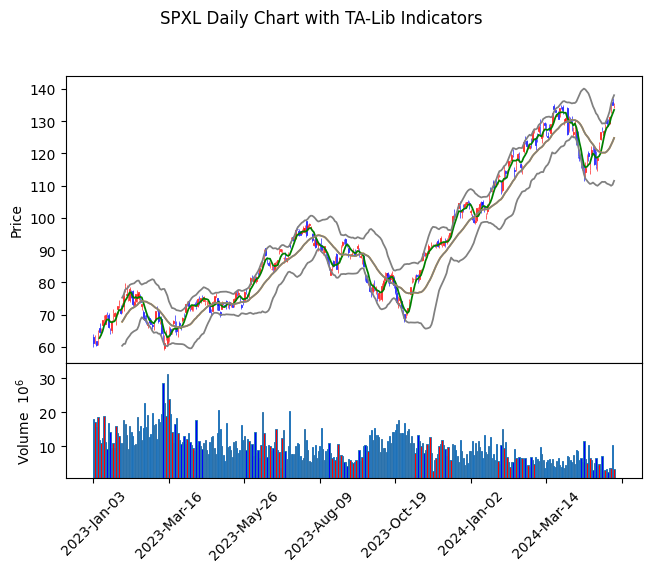

In [ ]:
import yfinance as yf
from datetime import datetime
import talib
import mplfinance as mpf

# SPXLのデータをダウンロード
df = yf.download("SPXL", start='2023-01-01', end=datetime.now(), interval="1d")

# 移動平均線 (SMA) を計算
df['SMA5'] = talib.SMA(df['Close'], timeperiod=5)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)

# ボリンジャーバンドを計算
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'], timeperiod=20)

# MACDを計算
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# ローソク足チャートのスタイルを設定
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)

# 追加するプロット要素を設定
apds = [
    mpf.make_addplot(df['SMA5'], color='green'),
    mpf.make_addplot(df['SMA20'], color='orange'),
    mpf.make_addplot(df['upper_band'], color='grey'),
    mpf.make_addplot(df['middle_band'], color='grey'),
    mpf.make_addplot(df['lower_band'], color='grey'),
]

# ローソク足チャートをプロット
mpf.plot(df, type='candle', style=s, addplot=apds, volume=True, title='SPXL Daily Chart with TA-Lib Indicators')


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!sudo make install

!pip install git+https://github.com/TA-Lib/ta-lib-python.git@TA_Lib-0.5.0

--2025-03-24 12:00:32--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:d95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.13.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2025-03-24 12:00:32--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:c95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2025-03-24 12:00:32--  http://cfhcable.dl.sour

In [ ]:
!pip install yfinance
!pip install mplfinance
!pip install numpy

### plot by plotly

In [ ]:
import yfinance as yf
from datetime import datetime
import talib
import plotly.graph_objects as go
import numpy as np

# SPXLのデータをダウンロード
df = yf.download("SPXL", start='2025-01-01', end=datetime.now(), interval="1d")

# 移動平均線 (SMA) を計算
print(df['Close'].values.shape)
df['SMA5'] = talib.SMA(np.ravel(df['Close'].values), timeperiod=5)
print(df.head())
df['SMA5'] = talib.SMA(df['Close'].values, timeperiod=5)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)

# ボリンジャーバンドを計算
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'], timeperiod=20)

# MACDを計算
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# ローソク足チャートをプロット
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

# 追加するプロット要素を設定
fig.add_trace(go.Scatter(x=df.index, y=df['SMA5'], line=dict(color='green', width=1.5), name='SMA5'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA20'], line=dict(color='orange', width=1.5), name='SMA20'))
fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], line=dict(color='grey', width=1), name='Upper Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['middle_band'], line=dict(color='grey', width=1), name='Middle Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], line=dict(color='grey', width=1), name='Lower Band'))

fig.update_layout(title='SPXL Daily Chart with TA-Lib Indicators', xaxis_rangeslider_visible=False)

fig.show()


[*********************100%***********************]  1 of 1 completed

(54, 1)
Price            Close        High         Low        Open   Volume  \
Ticker            SPXL        SPXL        SPXL        SPXL     SPXL   
Date                                                                  
2025-01-02  167.309998  173.039993  163.820007  171.529999  5967200   
2025-01-03  173.369995  174.050003  168.759995  169.729996  7668000   
2025-01-06  176.470001  180.289993  174.910004  177.240005  3588000   
2025-01-07  170.529999  178.550003  168.779999  178.210007  4255700   
2025-01-08  170.970001  172.000000  167.360001  170.389999  4246400   

Price             SMA5  
Ticker                  
Date                    
2025-01-02         NaN  
2025-01-03         NaN  
2025-01-06         NaN  
2025-01-07         NaN  
2025-01-08  171.729999  


Exception: input array has wrong dimensions

### ゴールデンクロス・デッドクロスの表示＋出来高の追加

In [ ]:
import yfinance as yf
from datetime import datetime
import talib
import plotly.graph_objects as go
import numpy as np

# SPXLのデータをダウンロード
df = yf.download("SPXL", start='2023-01-01', end=datetime.now(), interval="1d")

# 移動平均線 (SMA) を計算
df['SMA5'] = talib.SMA(df['Close'], timeperiod=5)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)

# ボリンジャーバンドを計算
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'], timeperiod=20)

# MACDを計算
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# ゴールデンクロスとデッドクロスのポイントを計算
df['golden_cross'] = np.where(df['SMA5'] > df['SMA20'], df['SMA5'], np.nan)
df['dead_cross'] = np.where(df['SMA5'] < df['SMA20'], df['SMA5'], np.nan)

# ローソク足チャートをプロット
fig = go.Figure()

# ローソク足チャート
fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Market data',
                yaxis='y2'))

# 出来高を追加
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume'))

# 追加するプロット要素を設定
fig.add_trace(go.Scatter(x=df.index, y=df['SMA5'], line=dict(color='blue', width=1.5), name='SMA5', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA20'], line=dict(color='orange', width=1.5), name='SMA20', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], line=dict(color='black', width=1), name='Upper Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['middle_band'], line=dict(color='black', width=1), name='Middle Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], line=dict(color='black', width=1), name='Lower Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['golden_cross'], mode='markers', marker=dict(color='gold', size=6), name='Golden Cross', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['dead_cross'], mode='markers', marker=dict(color='black', size=6), name='Dead Cross', yaxis='y2'))

# レイアウト設定
fig.update_layout(
    title='SPXL Daily Chart with TA-Lib Indicators',
    yaxis=dict(domain=[0, 0.2], title='Volume'),
    yaxis2=dict(domain=[0.2, 1], title='Price'),
    xaxis=dict(domain=[0, 1]),
    xaxis_rangeslider_visible=False
)

fig.show()


[*********************100%%**********************]  1 of 1 completed


### GC、DC修正

In [ ]:
import yfinance as yf
from datetime import datetime
import talib
import plotly.graph_objects as go
import numpy as np

# SPXLのデータをダウンロード
df = yf.download("SPXL", start='2023-01-01', end=datetime.now(), interval="1d")

# 移動平均線 (SMA) を計算
df['SMA5'] = talib.SMA(df['Close'], timeperiod=5)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)

# ボリンジャーバンドを計算
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'], timeperiod=20)

# MACDを計算
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# ゴールデンクロスとデッドクロスのポイントを計算
df['golden_cross'] = np.where((df['SMA5'] > df['SMA20']) & (df['SMA5'].shift(1) < df['SMA20'].shift(1)), df['SMA5'], np.nan)
df['dead_cross'] = np.where((df['SMA5'] < df['SMA20']) & (df['SMA5'].shift(1) > df['SMA20'].shift(1)), df['SMA5'], np.nan)

# ローソク足チャートをプロット
fig = go.Figure()

# ローソク足チャート
fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Market data',
                yaxis='y2'))

# 出来高を追加
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume'))

# 追加するプロット要素を設定
fig.add_trace(go.Scatter(x=df.index, y=df['SMA5'], line=dict(color='blue', width=1.5), name='SMA5', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA20'], line=dict(color='orange', width=1.5), name='SMA20', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], line=dict(color='black', width=1), name='Upper Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['middle_band'], line=dict(color='black', width=1), name='Middle Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], line=dict(color='black', width=1), name='Lower Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['golden_cross'], mode='markers', marker=dict(color='gold', size=6), name='Golden Cross', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['dead_cross'], mode='markers', marker=dict(color='black', size=6), name='Dead Cross', yaxis='y2'))

# レイアウト設定
fig.update_layout(
    title='SPXL Daily Chart with TA-Lib Indicators',
    yaxis=dict(domain=[0, 0.2], title='Volume'),
    yaxis2=dict(domain=[0.2, 1], title='Price'),
    xaxis=dict(domain=[0, 1]),
    xaxis_rangeslider_visible=False
)

fig.show()


[*********************100%%**********************]  1 of 1 completed


### RSI、一目均衡表、MACD追加

In [ ]:
import yfinance as yf
from datetime import datetime
import talib
import plotly.graph_objects as go
import numpy as np

# SPXLのデータをダウンロード
df = yf.download("SOXL", start='2023-01-01', end=datetime.now(), interval="1d")

# 移動平均線 (SMA) を計算
df['SMA5'] = talib.SMA(df['Close'], timeperiod=5)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)

# ボリンジャーバンドを計算
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'], timeperiod=20)

# MACDを計算
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# ゴールデンクロスとデッドクロスのポイントを計算
# df['golden_cross'] = np.where((df['SMA5'] > df['SMA20']) & (df['SMA5'].shift(1) < df['SMA20'].shift(1)), df['SMA5'], np.nan)
# df['dead_cross'] = np.where((df['SMA5'] < df['SMA20']) & (df['SMA5'].shift(1) > df['SMA20'].shift(1)), df['SMA5'], np.nan)
df['golden_cross'] = np.where((df['SMA5'] > df['SMA20']) & (df['SMA5'].shift(1) < df['SMA20'].shift(1)), True, False)
df['dead_cross'] = np.where((df['SMA5'] < df['SMA20']) & (df['SMA5'].shift(1) > df['SMA20'].shift(1)), True, False)

# RSIを計算
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# 一目均衡表を計算
df['tenkan_sen'] = (df['High'].rolling(window=9).max() + df['Low'].rolling(window=9).min()) / 2
df['kijun_sen'] = (df['High'].rolling(window=26).max() + df['Low'].rolling(window=26).min()) / 2
df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)
df['senkou_span_b'] = ((df['High'].rolling(window=52).max() + df['Low'].rolling(window=52).min()) / 2).shift(26)
df['chikou_span'] = df['Close'].shift(-26)

# ローソク足チャートをプロット
fig = go.Figure()

# ローソク足チャート
fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Market data',
                yaxis='y2'))

# 出来高を追加
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume'))

# 追加するプロット要素を設定
fig.add_trace(go.Scatter(x=df.index, y=df['SMA5'], line=dict(color='blue', width=1.5), name='SMA5', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA20'], line=dict(color='orange', width=1.5), name='SMA20', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], line=dict(color='black', width=1), name='Upper Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['middle_band'], line=dict(color='black', width=1), name='Middle Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], line=dict(color='black', width=1), name='Lower Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['golden_cross'], mode='markers', marker=dict(color='gold', size=6), name='Golden Cross', yaxis='y4'))
fig.add_trace(go.Scatter(x=df.index, y=df['dead_cross'], mode='markers', marker=dict(color='black', size=6), name='Dead Cross', yaxis='y4'))

# 追加するプロット要素を設定
fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], line=dict(color='purple', width=1.5), name='RSI', yaxis='y3'))
fig.add_trace(go.Scatter(x=df.index, y=df['tenkan_sen'], line=dict(color='red', width=1), name='Tenkan Sen', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['kijun_sen'], line=dict(color='blue', width=1), name='Kijun Sen', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['senkou_span_a'], line=dict(color='green', width=1), name='Senkou Span A', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['senkou_span_b'], line=dict(color='brown', width=1), name='Senkou Span B', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['chikou_span'], line=dict(color='grey', width=1), name='Chikou Span', yaxis='y2'))

# # レイアウト設定
# fig.update_layout(
#     title='SPXL Daily Chart with TA-Lib Indicators',
#     yaxis=dict(domain=[0, 0.2], title='Volume'),
#     yaxis2=dict(domain=[0.2, 1], title='Price'),
#     xaxis=dict(domain=[0, 1]),
#     xaxis_rangeslider_visible=False
# )

# レイアウト設定
fig.update_layout(
    title='SPXL Daily Chart with TA-Lib Indicators',
    yaxis=dict(domain=[0, 0.2], title='Volume'),
    yaxis4=dict(domain=[0.2, 0.3], title='cross'),
    yaxis2=dict(domain=[0.3, 1.0], title='Price'),
    # yaxis3=dict(domain=[0.8, 1], title='RSI', anchor="x", overlaying="y", side="right"),
    yaxis3=dict(domain=[0, 0.2], title='RSI', anchor="x", overlaying="y", side="right"),
    xaxis=dict(domain=[0, 1]),
    xaxis_rangeslider_visible=False
)

# RSIを新しい軸に割り当てる
# fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], line=dict(color='purple', width=1.5), name='RSI', yaxis='y3'))
df=df.dropna()
print(df.head())
print(df.tail())
fig.show()


# Ta-Lib

## 0pip ⇒ これなら行ける※8行目★

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!sudo make install

!pip install git+https://github.com/TA-Lib/ta-lib-python.git@TA_Lib-0.5.0

!pip install yfinance
!pip install mplfinance
!pip install numpy
!pip install keras
!pip install pandas
!pip install optuna
!pip install tensorflow
!pip install scikit-learn


## code

In [ ]:
import yfinance as yf
from datetime import datetime
import talib
import plotly.graph_objects as go
import numpy as np
import sys
import pandas as pd



from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "colab"



# SOXLのデータをダウンロード
df = yf.download("SOXL", start='2010-03-10', end=datetime.now(), interval="1d")
# df = yf.download("SOXL", start='2023-01-01', end=datetime.now(), interval="1d")
# print(df["Open"]["SOXL"].head())
df.columns = df.columns.get_level_values(0)  # 例: 第レベルのカラム名を保持
# ticker = yf.Ticker("SOXL")
# data = ticker.history(period="1mo")
# インデックスを 'Date' カラムに変換
# df = df.reset_index()  # インデックスをカラムに変換し、新しい数値インデックスを割り当てる
# df = df.rename(columns={'index': 'Date'})  # カラム名を 'Date' に変更

# 移動平均線 (EMA) を計算
df['EMA5'] = talib.EMA(df['Close'].values, timeperiod=5)
# df['EMA5'] = talib.EMA(df['Close'].values.flatten(), timeperiod=5)
df['EMA25'] = talib.EMA(df['Close'].values, timeperiod=25)

# ボリンジャーバンドを計算
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'].values, timeperiod=20)

# RSIを計算
df['RSI'] = talib.RSI(df['Close'].values, timeperiod=14)

# MACDを計算
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

# 移動平均乖離率を計算
df['Deviation'] = ((df['Close'] - df['EMA25']) / df['EMA25']) * 100

# 一目均衡表を計算
# df['tenkan_sen'] = (df['High'].rolling(window=9).max() + df['Low'].rolling(window=9).min()) / 2
# df['kijun_sen'] = (df['High'].rolling(window=26).max() + df['Low'].rolling(window=26).min()) / 2
# df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)
# df['senkou_span_b'] = ((df['High'].rolling(window=52).max() + df['Low'].rolling(window=52).min()) / 2).shift(26)
# df['chikou_span'] = df['Close'].shift(-26)


# Signal計算
# RSIシグナル
df['RSI_sig']=np.where(df['RSI'].shift(1)<50,df['lower_band']*0.8,np.nan)

# 移動平均乖離率シグナル
df['Deviation_sig_low']=np.where(df['Deviation']<-10,df['lower_band']*0.85,np.nan)
df['Deviation_sig_high']=np.where((df['Deviation']>0)&(df['Deviation']<10),df['upper_band']*1.15,np.nan)

#トレンド計算
df['UpUptrend']=np.where((df['EMA5'] > df['EMA25'])&(df['Close']>df['EMA5']),df['upper_band']*1.1,np.nan)
df['Uptrend']=np.where((df['EMA5'] > df['EMA25'])&(df['Close']<df['EMA5']),df['upper_band']*1.1,np.nan)
# df['Uptrend']=np.where(df['EMA5'] > df['EMA25'],df['upper_band']*1.05,np.nan)
# df['Downtrend']=np.where(df['EMA5'] < df['EMA25'],df['lower_band']*0.95,np.nan)
df['DownDowntrend']=np.where((df['EMA5'] < df['EMA25'])&(df['Close']<df['EMA5']),df['lower_band']*0.9,np.nan)
df['Downtrend']=np.where((df['EMA5'] < df['EMA25'])&(df['Close']>df['EMA5']),df['lower_band']*0.9,np.nan)
# トレンドを数値化8水準
df["Trend"] = np.where(sell_condition_1, -1,
               np.where(sell_condition_2, -2,
               np.where(sell_condition_3, -3,
               np.where(sell_condition_4, -4,
               np.where(buy_condition_1, 1,
               np.where(buy_condition_2, 2,
               np.where(buy_condition_3, 3,
               np.where(buy_condition_4, 4, None))))))))

# 売りの条件
sell_condition_1 = (df["EMA5"] < df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["Low"] >= df["Low"].shift(1))
sell_condition_2 = (df["EMA5"] < df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["Low"] < df["Low"].shift(1))
sell_condition_3 = (df["EMA5"] < df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["Low"] >= df["Low"].shift(1))
sell_condition_4 = (df["EMA5"] < df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["Low"] < df["Low"].shift(1))

# 買いの条件
buy_condition_1 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["High"] < df["High"].shift(1))
buy_condition_2 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["High"] >= df["High"].shift(1))
buy_condition_3 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["High"] < df["High"].shift(1))
buy_condition_4 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["High"] >= df["High"].shift(1))


# 結果を確認

# ゴールデンクロスとデッドクロスのポイントを計算
# df['golden_cross'] = np.where((df['SMA5'] > df['SMA20']) & (df['SMA5'].shift(1) < df['SMA20'].shift(1)), df['SMA5'], np.nan)
# df['dead_cross'] = np.where((df['SMA5'] < df['SMA20']) & (df['SMA5'].shift(1) > df['SMA20'].shift(1)), df['SMA5'], np.nan)
df['golden_cross'] = np.where((df['EMA5'] > df['EMA25']) & (df['EMA5'].shift(1) < df['EMA25'].shift(1)), True, False)
df['dead_cross'] = np.where((df['EMA5'] < df['EMA25']) & (df['EMA5'].shift(1) > df['EMA25'].shift(1)), True, False)

# Bottomを計算
df['Bottom']=np.where((df['High'].shift(-1)>df['High'])&(df['High']<df['High'].shift(1)),df['Low'],np.nan)
# Topを計算
df['Top']=np.where((df['Low'].shift(-1)<df['Low'])&(df['Low']>df['Low'].shift(1)),df['High'],np.nan)

#出来高index==abs(当日出来高/((当日終値-前日終値)/当日終値))
# df['Volume_index']=1/(abs(df['Volume']/((df['Close']-df['Close'].shift(1))/df['Close'])))
# df['Volume_index']=df['Volume']/((df['High']-df['Low'])/df['Low'])
df['Volume_index']=np.log(abs(df['Volume']/((df['Close']-df['Open'])/df['Open'])))
print(df.tail())



# Entryを計算
df['Entry']=np.where(
    (df['Bottom'].shift(2).notna()) & (df['High'].shift(1) < df['High']),
    df['High'].shift(1),  np.nan
    )
# Exitを計算
df['Exit']=np.where(
    (df['High'].shift(2)>df['upper_band'].shift(2)) & (df['High'].shift(2)>df['High'].shift(1)),
    df['Open'],  np.nan
    )



#株価の平均上昇率を計算
# 始値から終値の上昇率を計算 (%)
df["Open_to_Close_Change"] = ((df["Close"] - df["Open"]) / df["Open"]) * 100
# 始値から高値の上昇率を計算 (%)
df["Open_to_High_Change"] = ((df["High"] - df["Open"]) / df["Open"]) * 100
# 前日終値から当日終値の上昇率を計算 (%)
df["Close_to_Close_Change"] = df["Close"].pct_change() * 100
# 前日終値から当日高値の上昇率を計算 (%)
df["PrevClose_to_High_Change"] = ((df["High"] - df["Close"].shift(1)) / df["Close"].shift(1)) * 100

# 平均上昇率を計算
average_open_to_close = df["Open_to_Close_Change"].mean()
average_open_to_high = df["Open_to_High_Change"].mean()
average_close_to_close = df["Close_to_Close_Change"].mean()
average_prevclose_to_high = df["PrevClose_to_High_Change"].mean()

# # 5EMA>25EMAのとき
# # 始値から終値の上昇率を計算 (%)
# df["Open_to_Close_Change"] =np.where(df['EMA5']>df['EMA25'], ((df["Close"] - df["Open"]) / df["Open"]) * 100,np.nan)
# # 始値から高値の上昇率を計算 (%)
# df["Open_to_High_Change"] = np.where(df['EMA5']>df['EMA25'],((df["High"] - df["Open"]) / df["Open"]) * 100,np.nan)
# # 前日終値から当日終値の上昇率を計算 (%)
# df["Close_to_Close_Change"] = np.where(df['EMA5']>df['EMA25'],df["Close"].pct_change() * 100,np.nan)
# # 前日終値から当日高値の上昇率を計算 (%)
# df["PrevClose_to_High_Change"] = np.where(df['EMA5']>df['EMA25'],((df["High"] - df["Close"].shift(1)) / df["Close"].shift(1)) * 100,np.nan)
# # 平均上昇率を計算
# average_open_to_close = df["Open_to_Close_Change"].mean()
# average_open_to_high = df["Open_to_High_Change"].mean()
# average_close_to_close = df["Close_to_Close_Change"].mean()
# average_prevclose_to_high = df["PrevClose_to_High_Change"].mean()

# 結果を出力
print(f"始値から終値の平均上昇率: {average_open_to_close:.2f}%")
print(f"始値から高値の平均上昇率: {average_open_to_high:.2f}%")
print(f"終値の平均上昇率: {average_close_to_close:.2f}%")
print(f"前日終値から高値の平均上昇率: {average_prevclose_to_high:.2f}%")






# fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
#                     vertical_spacing=0.03,
#                     row_heights=[0.7,0.1 ,0.1,0.1])

# サブプロット作成（row=1,col=1には第二軸のy設定）
fig = make_subplots(rows=5, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03,
                    row_heights=[0.6, 0.1, 0.1, 0.1,0.1],
                    specs=[[{"secondary_y": True}], [{}], [{}], [{}], [{}]])

# ローソク足チャート
candlestick=go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Market df',
                )
fig.add_trace(candlestick, row=1, col=1)
# # 自動調整の設定
# fig.update_layout(
#     dragmode="zoom",  # ズームモードを有効化
#     yaxis1=dict(
#         title="Price",            # Y軸のタイトル
#         autorange=True,           # データ範囲に基づいて自動調整
#         scaleanchor="x",
#         ticks="outside",          # 目盛りを外側に配置
#         showgrid=True,             # グリッド線の表示
#         fixedrange=False
#         ),
#     xaxis_rangeslider_visible=False,
#     # width=1200,  # 横幅
#     height=1200,  # 高さ

# )
# 出来高を追加
volume_bar=go.Bar(x=df.index, y=df['Volume'], name='Volume')
fig.add_trace(volume_bar, row=3, col=1)

EMA5_scatter=go.Scatter(x=df.index, y=df['EMA5'], line=dict(color='blue', width=1.5), name='EMA5', yaxis='y1')
fig.add_trace(EMA5_scatter, row=1, col=1)
EMA25_scatter=go.Scatter(x=df.index, y=df['EMA25'], line=dict(color='orange', width=1.5), name='EMA25', yaxis='y1')
fig.add_trace(EMA25_scatter, row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['Bottom'], mode='markers', marker=dict(color='blue',symbol='circle-open', size=6), name='Bottom', yaxis='y1'))

fig.add_trace(go.Scatter(x=df.index, y=df['Top'], mode='markers', marker=dict(color='yellow',symbol='circle-open', size=6), name='Top', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], line=dict(color='black', width=1), name='Upper Band', yaxis='y1'))
# fig.add_trace(go.Scatter(x=df.index, y=df['middle_band'], line=dict(color='black', width=1), name='Middle Band', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], line=dict(color='black', width=1), name='Lower Band', yaxis='y1'))

#Entry & Exit
fig.add_trace(go.Scatter(x=df.index, y=df['Entry'], mode='markers', marker=dict(color='black', size=5,symbol='x'), name='Entry', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Exit'], mode='markers', marker=dict(color='blue', size=5,symbol='star'), name='Exit', yaxis='y1'))

#Trend
fig.add_trace(go.Scatter(x=df.index, y=df['Uptrend'], mode='markers', marker=dict(color='pink', size=5,symbol='cross'), name='Uptrend', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Downtrend'], mode='markers', marker=dict(color='green', size=5,symbol='cross'), name='DownTrend', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['UpUptrend'], mode='markers', marker=dict(color='red', size=5,symbol='cross'), name='UpUptrend', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['DownDowntrend'], mode='markers', marker=dict(color='blue', size=5,symbol='cross'), name='DownDownTrend', yaxis='y1'))

# fig.add_trace(go.Scatter(x=df.index, y=df['Downtrend'], mode='markers', marker=dict(color='blue', size=5,symbol='cross'), name='Downtrend', yaxis='y1'),row=4,col=1)

#Deviation
fig.add_trace(go.Scatter(x=df.index, y=df['Deviation_sig_high'], mode='markers', marker=dict(color='orange', size=5,symbol='cross'), name='dev_sig_h', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Deviation_sig_low'], mode='markers', marker=dict(color='orange', size=5,symbol='cross'), name='dev_sog_l', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Deviation'], line=dict(color='orange') ,name='Deviation'),row=4,col=1)

#RSI
# fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], line=dict(color='green', width=1.5), name='RSI'),row=2,col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['RSI_sig'], mode='markers', marker=dict(color='green', size=5,symbol='cross'), name='RSI_sig'),row=1,col=1)

# #Volume_index
# fig.add_trace(go.Scatter(x=df.index, y=df['Volume_index'], line=dict(color='green', width=1.5), name='volume_index'),row=2,col=1)
#Trend
fig.add_trace(go.Scatter(x=df.index, y=df['Trend'], line=dict(color='green', width=1.5), name='Trend'),row=2,col=1)
# # df['Deviation'] を第二軸にプロット
# deviation_scatter = go.Scatter(
#     x=df.index,
#     y=df['Deviation'],
#     line=dict(color='Orange', width=1.5),
#     name='Deviation'
# )
# fig.add_trace(deviation_scatter, row=1, col=1, secondary_y=True)

# レイアウト設定
fig.update_layout(
    dragmode="zoom",  # ズームモードを有効化
    yaxis1=dict(title="Price"),
    # yaxis2=dict(title="Deviation", overlaying='y', side='right'),  # 第二軸の設定
    height=1200,
    xaxis_rangeslider_visible=False
)

###




fig.show(config={'responsive': True})  # 画面サイズに合わせてグラフが調整されます
import plotly.io as pio
# ファイルを保存し、自動的にブラウザで開く
# pio.write_html(fig, file='/content/candlestick_chart.html', auto_open=True)
# print(df)


[*********************100%***********************]  1 of 1 completed


ValueError: Length of values (571) does not match length of index (3797)

##株価取得の最大数

In [5]:
import yfinance as yf

# 銘柄コードを指定してデータを取得
ticker = yf.Ticker("SOXS")  # 例: Appleの株価データ
history = ticker.history(period="max")  # "max"で取得可能な最古のデータまで取得
print(history.head())  # 最古のデータを表示


                                   Open          High           Low  \
Date                                                                  
2010-03-11 00:00:00-05:00  1.656065e+08  1.656065e+08  1.609708e+08   
2010-03-12 00:00:00-05:00  1.608909e+08  1.643677e+08  1.580935e+08   
2010-03-15 00:00:00-04:00  1.689635e+08  1.711614e+08  1.677246e+08   
2010-03-16 00:00:00-04:00  1.588529e+08  1.588529e+08  1.563752e+08   
2010-03-17 00:00:00-04:00  1.563752e+08  1.563752e+08  1.563752e+08   

                                 Close  Volume  Dividends  Stock Splits  \
Date                                                                      
2010-03-11 00:00:00-05:00  160970816.0       0        0.0           0.0   
2010-03-12 00:00:00-05:00  164287744.0       0        0.0           0.0   
2010-03-15 00:00:00-04:00  170242272.0       0        0.0           0.0   
2010-03-16 00:00:00-04:00  156375152.0       0        0.0           0.0   
2010-03-17 00:00:00-04:00  156375152.0       0      

## XGBoost
- [ ]寄与の高いモノ選別？
- [x] データ数増やす
- [ ]ボリンジャーバンドタッチ導入

[*********************100%***********************]  1 of 1 completed


Best parameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': np.float64(0.020000000000000004), 'colsample_bytree': 0.9}
Best score: 0.8689943813782822
Accuracy: 0.8782608695652174
Confusion Matrix:
[[47  7]
 [ 7 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        54
           1       0.89      0.89      0.89        61

    accuracy                           0.88       115
   macro avg       0.88      0.88      0.88       115
weighted avg       0.88      0.88      0.88       115



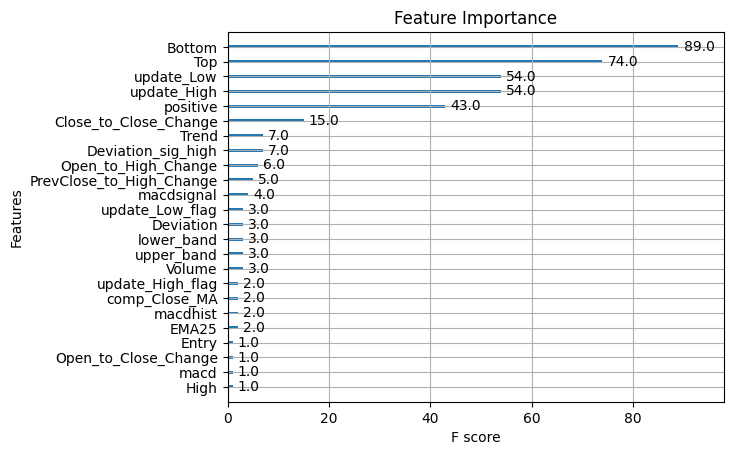

Feature Importances: {'High': 1.0, 'Volume': 3.0, 'EMA25': 2.0, 'upper_band': 3.0, 'lower_band': 3.0, 'macd': 1.0, 'macdsignal': 4.0, 'macdhist': 2.0, 'Deviation': 3.0, 'Deviation_sig_high': 7.0, 'comp_Close_MA': 2.0, 'update_High': 54.0, 'update_Low': 54.0, 'positive': 43.0, 'update_High_flag': 2.0, 'update_Low_flag': 3.0, 'Trend': 7.0, 'Bottom': 89.0, 'Top': 74.0, 'Open_to_Close_Change': 1.0, 'Open_to_High_Change': 6.0, 'Close_to_Close_Change': 15.0, 'PrevClose_to_High_Change': 5.0, 'Entry': 1.0}
Price       Label  Predictions  Difference
Date                                      
2023-01-03      1          NaN         NaN
2023-01-04      0          NaN         NaN
2023-01-05      1          1.0         0.0
2023-01-06      1          NaN         NaN
2023-01-09      0          NaN         NaN
...           ...          ...         ...
2025-04-09      0          1.0         1.0
2025-04-10      0          0.0         0.0
2025-04-11      1          NaN         NaN
2025-04-14      0      

In [6]:
import yfinance as yf
from datetime import datetime
import talib
import plotly.graph_objects as go
import numpy as np
import sys
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "colab"



# SOXLのデータをダウンロード
# df = yf.download("SOXL", start='2010-03-11', end=datetime.now(), interval="1d")
df = yf.download("SOXL", start='2023-01-01', end=datetime.now(), interval="1d")
# df = yf.download("SPXL", start='2023-01-01', end=datetime.now(), interval="1d")
# df = yf.download("SOXS", start='2023-01-01', end=datetime.now(), interval="1d")
# df = yf.download("SOLL", start='2010-03-11', end=datetime.now(), interval="1wk")
# df = yf.download("SOXL", start='2023-01-01', end=datetime.now(), interval="1wk")
df.columns = df.columns.get_level_values(0)  # 例: 第レベルのカラム名を保持

# df['Label'] = (df['High'].shift(-1) > df['High']).astype(int)
# print(df.tail())
# sys.exit()
# テクニカル分析指標計算
# 移動平均線 (EMA) を計算
df['EMA5'] = talib.EMA(df['Close'].values, timeperiod=5)
df['EMA25'] = talib.EMA(df['Close'].values, timeperiod=25)

# ボリンジャーバンドを計算
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'].values, timeperiod=20)

# RSIを計算
df['RSI'] = talib.RSI(df['Close'].values, timeperiod=14)

# MACDを計算
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

# 移動平均乖離率を計算
df['Deviation'] = ((df['Close'] - df['EMA25']) / df['EMA25']) * 100


# Signal計算
# RSIシグナル
df['RSI_sig']=np.where(df['RSI'].shift(1)<50,1,0)
# df['RSI_sig']=np.where(df['RSI'].shift(1)<50,df['lower_band']*0.8,np.nan)

# 移動平均乖離率シグナル
df['Deviation_sig_low']=np.where(df['Deviation']<-10,1,0)
# df['Deviation_sig_high']=np.where((df['Deviation']>0)&(df['Deviation']<10),-1,0)

# df['Deviation_sig_low']=np.where(df['Deviation']<-10,df['lower_band']*0.85,np.nan)
df['Deviation_sig_high']=np.where((df['Deviation']>0)&(df['Deviation']<10),df['upper_band']*1.15,np.nan)

#トレンド計算
# df['UpUptrend']=np.where((df['EMA5'] > df['EMA25'])&(df['Close']>df['EMA5']),df['upper_band']*1.1,np.nan)
# df['Uptrend']=np.where((df['EMA5'] > df['EMA25'])&(df['Close']<df['EMA5']),df['upper_band']*1.1,np.nan)
# df['DownDowntrend']=np.where((df['EMA5'] < df['EMA25'])&(df['Close']<df['EMA5']),df['lower_band']*0.9,np.nan)
# df['Downtrend']=np.where((df['EMA5'] < df['EMA25'])&(df['Close']>df['EMA5']),df['lower_band']*0.9,np.nan)
# # トレンドを数値化8水準
# # 売りの条件
# sell_condition_1 = (df["EMA5"] < df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["Low"] >= df["Low"].shift(1))
# sell_condition_2 = (df["EMA5"] < df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["Low"] < df["Low"].shift(1))
# sell_condition_3 = (df["EMA5"] < df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["Low"] >= df["Low"].shift(1))
# sell_condition_4 = (df["EMA5"] < df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["Low"] < df["Low"].shift(1))
# # 買いの条件
# buy_condition_1 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["High"] < df["High"].shift(1))
# buy_condition_2 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["High"] >= df["High"].shift(1))
# buy_condition_3 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["High"] < df["High"].shift(1))
# buy_condition_4 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["High"] >= df["High"].shift(1))
# df["Trend"] = np.where(sell_condition_1, -1,
#                np.where(sell_condition_2, -2,
#                np.where(sell_condition_3, -3,
#                np.where(sell_condition_4, -4,
#                np.where(buy_condition_1, 1,
#                np.where(buy_condition_2, 2,
#                np.where(buy_condition_3, 3,
#                np.where(buy_condition_4, 4, 0))))))))
# トレンドを数値化5水準
df['comp_MA']=(df['EMA5']-df['EMA25'])/df['EMA25']
df['comp_Close_MA']=(df['Close']-df['EMA5'])/df['EMA5']
df['update_High']=(df['High']-df['High'].shift(1))/df['High'].shift(1)
df['update_Low']=(df['Low']-df['Low'].shift(1))/df['Low'].shift(1)
df['positive']=(df['Close']-df['Open'])/df['Open']
df['comp_MA_flag']=np.where(df['comp_MA']>0,1,-1)
df['comp_Close_MA_flag']=np.where(df['comp_Close_MA']>0,1,-1)
df['update_High_flag']=np.where(df['update_High']>0,1,0)
df['update_Low_flag']=np.where(df['update_Low']<0,-1,0)
df['positive_flag']=np.where(df['positive']>0,1,-1)
df["Trend"] = df['comp_MA_flag']+df['comp_Close_MA_flag']+df['update_High_flag']+df['update_Low_flag']+df['positive_flag']

# ゴールデンクロスとデッドクロスのポイントを計算
df['golden_cross'] = np.where((df['EMA5'] > df['EMA25']) & (df['EMA5'].shift(1) < df['EMA25'].shift(1)), 1, 0)
df['dead_cross'] = np.where((df['EMA5'] < df['EMA25']) & (df['EMA5'].shift(1) > df['EMA25'].shift(1)), 1, 0)

# df['golden_cross'] = np.where((df['SMA5'] > df['SMA20']) & (df['SMA5'].shift(1) < df['SMA20'].shift(1)), df['SMA5'], np.nan)
# df['dead_cross'] = np.where((df['SMA5'] < df['SMA20']) & (df['SMA5'].shift(1) > df['SMA20'].shift(1)), df['SMA5'], np.nan)
# df['golden_cross'] = np.where((df['EMA5'] > df['EMA25']) & (df['EMA5'].shift(1) < df['EMA25'].shift(1)), 1, np.nan)
# df['dead_cross'] = np.where((df['EMA5'] < df['EMA25']) & (df['EMA5'].shift(1) > df['EMA25'].shift(1)), -1, np.nan)

# Bottomを計算
# df['Bottom']=np.where((df['High'].shift(-1)>df['High'])&(df['High']<df['High'].shift(1)),1,0)

df['Bottom']=np.where((df['High'].shift(-1)>df['High'])&(df['High']<df['High'].shift(1)),df['Low'],np.nan)
# Topを計算
# df['Top']=np.where((df['Low'].shift(-1)<df['Low'])&(df['Low']>df['Low'].shift(1)),-1,0)
df['Top']=np.where((df['Low'].shift(-1)<df['Low'])&(df['Low']>df['Low'].shift(1)),df['High'],np.nan)

#出来高index==abs(当日出来高/((当日終値-前日終値)/当日終値))
# df['Volume_index']=1/(abs(df['Volume']/((df['Close']-df['Close'].shift(1))/df['Close'])))
# df['Volume_index']=df['Volume']/((df['High']-df['Low'])/df['Low'])
# df['Volume_index']=np.log(abs(df['Volume']/((df['Close']-df['Open'])/df['Open'])))
# print(df.tail())


#株価の平均上昇率を計算
# 始値から終値の上昇率を計算 (%)
df["Open_to_Close_Change"] = ((df["Close"] - df["Open"]) / df["Open"]) * 100
# 始値から高値の上昇率を計算 (%)
df["Open_to_High_Change"] = ((df["High"] - df["Open"]) / df["Open"]) * 100
# 前日終値から当日終値の上昇率を計算 (%)
df["Close_to_Close_Change"] = df["Close"].pct_change() * 100
# 前日終値から当日高値の上昇率を計算 (%)
df["PrevClose_to_High_Change"] = ((df["High"] - df["Close"].shift(1)) / df["Close"].shift(1)) * 100

# # 平均上昇率を計算
# average_open_to_close = df["Open_to_Close_Change"].mean()
# average_open_to_high = df["Open_to_High_Change"].mean()
# average_close_to_close = df["Close_to_Close_Change"].mean()
# average_prevclose_to_high = df["PrevClose_to_High_Change"].mean()

# Entryを計算
df['Entry']=np.where(
    (df['Bottom'].shift(2).notna()) & (df['High'].shift(1) < df['High']), 1, 0 )

# df['Entry']=np.where(
#     (df['Bottom'].shift(2).notna()) & (df['High'].shift(1) < df['High']),
#     df['High'].shift(1),  np.nan
#     )
# Exitを計算
df['Exit']=np.where(
    (df['High'].shift(2)>df['upper_band'].shift(2)) & (df['High'].shift(2)>df['High'].shift(1)), 1,0)

# df['Exit']=np.where(
#     (df['High'].shift(2)>df['upper_band'].shift(2)) & (df['High'].shift(2)>df['High'].shift(1)),
#     df['Open'],  np.nan
#     )


#XGBoost
# print(df.tail())
# 特徴量の準備
X = df.iloc[:, :]
# 'Exit' と 'dead_cross' を除いた特徴量を選択
# X = df[['Close', 'High', 'Low', 'Open', 'Volume', 'EMA5', 'EMA25',
#         'upper_band', 'middle_band', 'lower_band', 'RSI', 'macd',
#         'macdsignal', 'macdhist', 'Deviation', 'RSI_sig', 'Trend',
#         'golden_cross', 'Bottom', 'Top', 'Entry']]
# ラベルの作成 (1: 上昇, 0: 下降)
# df['Label'] = (df['Close'] > df['Open']).astype(int)
#次の日の終値が上がるか下がるか
# df['Label'] = (df['Close'].shift(-1) > df['Open'].shift(-1)).astype(int)
# df['Label'] = (df['Close'].shift(-1) > df['Close']).astype(int)
# df['Label'] = (df['Close'].shift(-1) > df['Open']).astype(int)

df['Label'] = (df['High'].shift(-1) > df['High']).astype(int)#★ ⇒  ◯ 90%
# df['Label'] = ((df['High'].shift(-1) > df['High'])&(df['High'].shift(-2) > df['High'].shift(-1))).astype(int)# ⇒ 70%
# df['Label'] = (df['High'].shift(-1) > df['Open'].shift(-1)).astype(int)

# df['Label'] = np.where(df['High'].shift(-1) > df['High'],2,
#                        np.where(df['Low'].shift(-1) < df['Low'],0,1))

# df['Label'] = (df['Low'].shift(-1) < df['Low']).astype(int)

# selected_columns = ['High', 'Low', 'Label']
# print(df[selected_columns])
#確認
# print(df['Label'].tail())

y = df['Label']

# print(df.dtypes)
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ハイパーパラメータ候補を設定
param_dist = {
    'n_estimators': [50,100, 500, 1000],
    'max_depth': [3, 6, 10],
    'learning_rate': np.linspace(0.01, 0.1, num=10),
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
# モデルを定義
model = xgb.XGBClassifier(objective='binary:logistic')

# ランダムサーチを実行
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=50, cv=3, random_state=42)
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=500, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# 最適なパラメータを出力
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)
# XGBoostの分類モデルを定義
# model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=6, objective='binary:logistic')
# model.fit(X_train, y_train)

# 最適なモデルを取得
best_model = random_search.best_estimator_
# model_save_path = './best_model.keras'
# モデルを保存するパスを指定
model_save_path = "./best_model.json"
# モデルを保存
best_model.save_model(model_save_path)

# テストデータで予測
y_pred = best_model.predict(X_test)
# # テストデータで予測
# y_pred = model.predict(X_test)
# y_pred を DataFrame df の新しい列 'Predictions' として追加
df.loc[X_test.index, 'Predictions'] = y_pred
# print(df["Predictions"])

# DataFrame を確認
# print(df.tail())

# モデルの評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# 特徴量の重要度を可視化
# plot_importance(model, importance_type='weight')  # importance_type は 'weight', 'gain', 'cover' が利用可能
plot_importance(best_model, importance_type='weight')  # importance_type は 'weight', 'gain', 'cover' が利用可能
plt.title("Feature Importance")
plt.show()

# 特徴量重要度の数値データを取得
# booster = model.get_booster()
booster = best_model.get_booster()
importance = booster.get_score(importance_type='weight')
print("Feature Importances:", importance)

# 結果確認
df['Difference'] = abs(df['Predictions'] - df['Label'])

selected_columns = ['Label', 'Predictions', 'Difference']
print(df[selected_columns])


# # 5EMA>25EMAのとき
# # 始値から終値の上昇率を計算 (%)
# df["Open_to_Close_Change"] =np.where(df['EMA5']>df['EMA25'], ((df["Close"] - df["Open"]) / df["Open"]) * 100,np.nan)
# # 始値から高値の上昇率を計算 (%)
# df["Open_to_High_Change"] = np.where(df['EMA5']>df['EMA25'],((df["High"] - df["Open"]) / df["Open"]) * 100,np.nan)
# # 前日終値から当日終値の上昇率を計算 (%)
# df["Close_to_Close_Change"] = np.where(df['EMA5']>df['EMA25'],df["Close"].pct_change() * 100,np.nan)
# # 前日終値から当日高値の上昇率を計算 (%)
# df["PrevClose_to_High_Change"] = np.where(df['EMA5']>df['EMA25'],((df["High"] - df["Close"].shift(1)) / df["Close"].shift(1)) * 100,np.nan)
# # 平均上昇率を計算
# average_open_to_close = df["Open_to_Close_Change"].mean()
# average_open_to_high = df["Open_to_High_Change"].mean()
# average_close_to_close = df["Close_to_Close_Change"].mean()
# average_prevclose_to_high = df["PrevClose_to_High_Change"].mean()

# # 結果を出力
# print(f"始値から終値の平均上昇率: {average_open_to_close:.2f}%")
# print(f"始値から高値の平均上昇率: {average_open_to_high:.2f}%")
# print(f"終値の平均上昇率: {average_close_to_close:.2f}%")
# print(f"前日終値から高値の平均上昇率: {average_prevclose_to_high:.2f}%")


#グラフ化
# サブプロット作成（row=1,col=1には第二軸のy設定）
fig = make_subplots(rows=5, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03,
                    row_heights=[0.6, 0.1, 0.1, 0.1,0.1],
                    specs=[[{"secondary_y": True}], [{}], [{}], [{}], [{}]])

# ローソク足チャート
candlestick=go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Market df',
                )
fig.add_trace(candlestick, row=1, col=1)
# 出来高を追加
volume_bar=go.Bar(x=df.index, y=df['Volume'], name='Volume')
fig.add_trace(volume_bar, row=3, col=1)

EMA5_scatter=go.Scatter(x=df.index, y=df['EMA5'], line=dict(color='blue', width=1.5), name='EMA5', yaxis='y1')
fig.add_trace(EMA5_scatter, row=1, col=1)
EMA25_scatter=go.Scatter(x=df.index, y=df['EMA25'], line=dict(color='orange', width=1.5), name='EMA25', yaxis='y1')
fig.add_trace(EMA25_scatter, row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['Bottom'], mode='markers', marker=dict(color='blue',symbol='circle-open', size=6), name='Bottom', yaxis='y1'))

fig.add_trace(go.Scatter(x=df.index, y=df['Top'], mode='markers', marker=dict(color='yellow',symbol='circle-open', size=6), name='Top', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], line=dict(color='black', width=1), name='Upper Band', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], line=dict(color='black', width=1), name='Lower Band', yaxis='y1'))

#Entry & Exit
fig.add_trace(go.Scatter(x=df.index, y=df['Entry'], mode='markers', marker=dict(color='black', size=5,symbol='x'), name='Entry', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Exit'], mode='markers', marker=dict(color='blue', size=5,symbol='star'), name='Exit', yaxis='y1'))

#Trend
# fig.add_trace(go.Scatter(x=df.index, y=df['Uptrend'], mode='markers', marker=dict(color='pink', size=5,symbol='cross'), name='Uptrend', yaxis='y1'))
# fig.add_trace(go.Scatter(x=df.index, y=df['Downtrend'], mode='markers', marker=dict(color='green', size=5,symbol='cross'), name='DownTrend', yaxis='y1'))
# fig.add_trace(go.Scatter(x=df.index, y=df['UpUptrend'], mode='markers', marker=dict(color='red', size=5,symbol='cross'), name='UpUptrend', yaxis='y1'))
# fig.add_trace(go.Scatter(x=df.index, y=df['DownDowntrend'], mode='markers', marker=dict(color='blue', size=5,symbol='cross'), name='DownDownTrend', yaxis='y1'))

# fig.add_trace(go.Scatter(x=df.index, y=df['Downtrend'], mode='markers', marker=dict(color='blue', size=5,symbol='cross'), name='Downtrend', yaxis='y1'),row=4,col=1)

#Deviation
fig.add_trace(go.Scatter(x=df.index, y=df['Deviation_sig_high'], mode='markers', marker=dict(color='orange', size=5,symbol='cross'), name='dev_sig_h', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Deviation_sig_low'], mode='markers', marker=dict(color='orange', size=5,symbol='cross'), name='dev_sog_l', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Deviation'], line=dict(color='orange') ,name='Deviation'),row=4,col=1)

#RSI
fig.add_trace(go.Scatter(x=df.index, y=df['RSI_sig'], mode='markers', marker=dict(color='green', size=5,symbol='cross'), name='RSI_sig'),row=1,col=1)
# fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], line=dict(color='green', width=1.5), name='RSI'),row=2,col=1)

# #Volume_index
# fig.add_trace(go.Scatter(x=df.index, y=df['Volume_index'], line=dict(color='green', width=1.5), name='volume_index'),row=2,col=1)
#Trend
# fig.add_trace(go.Scatter(x=df.index, y=df['Trend'], line=dict(color='green', width=1.5), name='Trend'),row=2,col=1)
#Predictions
fig.add_trace(go.Scatter(x=df.index, y=df['Predictions'], line=dict(color='green', width=1.5), name='Predictions'),row=2,col=1)
# df['Predictons'] を第二軸にプロット
predictions_scatter = go.Scatter(
    x=df.index,
    y=df['Predictions'],
    line=dict(color='Gold', width=3),
    name='Predictions'
)
fig.add_trace(predictions_scatter, row=1, col=1, secondary_y=True)

# df['Difference'] を第二軸にプロット
predictions_scatter = go.Scatter(
    x=df.index,
    y=df['Difference'],
    line=dict(color='Red', width=3),
    name='Difference'
)
fig.add_trace(predictions_scatter, row=1, col=1, secondary_y=True)
# レイアウト設定
fig.update_layout(
    dragmode="zoom",  # ズームモードを有効化
    yaxis1=dict(title="Price"),
    yaxis2=dict(title="Predictions", overlaying='y', side='right'),  # 第二軸の設定
    height=1200,
    xaxis_rangeslider_visible=False
)



fig.show(config={'responsive': True})  # 画面サイズに合わせてグラフが調整されます
# import plotly.io as pio
# ファイルを保存し、自動的にブラウザで開く
# pio.write_html(fig, file='/content/candlestick_chart.html', auto_open=True)
# print(df)


## カレントディレクトリの確認

In [8]:
import os
print(os.getcwd())


/content/ta-lib


## Modelの保存(コード修正 すべて)

[*********************100%***********************]  1 of 1 completed


Best parameters: {'subsample': 0.9, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': np.float64(0.01), 'colsample_bytree': 0.9}
Best score: 0.8515221878224976
Accuracy: 0.8695652173913043
Confusion Matrix:
[[47  7]
 [ 8 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        54
           1       0.88      0.87      0.88        61

    accuracy                           0.87       115
   macro avg       0.87      0.87      0.87       115
weighted avg       0.87      0.87      0.87       115



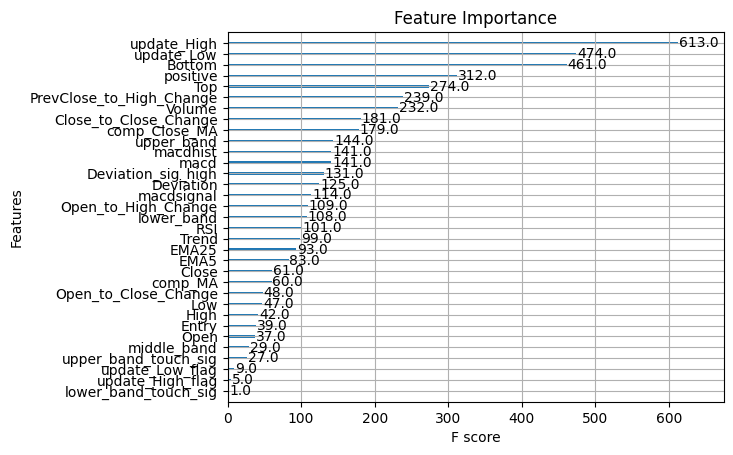

Feature Importances: {'Close': 61.0, 'High': 42.0, 'Low': 47.0, 'Open': 37.0, 'Volume': 232.0, 'EMA5': 83.0, 'EMA25': 93.0, 'upper_band': 144.0, 'middle_band': 29.0, 'lower_band': 108.0, 'RSI': 101.0, 'macd': 141.0, 'macdsignal': 114.0, 'macdhist': 141.0, 'Deviation': 125.0, 'upper_band_touch_sig': 27.0, 'lower_band_touch_sig': 1.0, 'Deviation_sig_high': 131.0, 'comp_MA': 60.0, 'comp_Close_MA': 179.0, 'update_High': 613.0, 'update_Low': 474.0, 'positive': 312.0, 'update_High_flag': 5.0, 'update_Low_flag': 9.0, 'Trend': 99.0, 'Bottom': 461.0, 'Top': 274.0, 'Open_to_Close_Change': 48.0, 'Open_to_High_Change': 109.0, 'Close_to_Close_Change': 181.0, 'PrevClose_to_High_Change': 239.0, 'Entry': 39.0}
Price       Label  Predictions  Difference
Date                                      
2023-01-03      1          NaN         NaN
2023-01-04      0          NaN         NaN
2023-01-05      1          1.0         0.0
2023-01-06      1          NaN         NaN
2023-01-09      0          NaN        

In [5]:
import yfinance as yf
from datetime import datetime
import talib
import plotly.graph_objects as go
import numpy as np
import sys
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "colab"



# SOXLのデータをダウンロード
df = yf.download("SOXL", start='2023-01-01', end=datetime.now(), interval="1d")
df.columns = df.columns.get_level_values(0)  # 例: 第レベルのカラム名を保持

# テクニカル分析指標計算
# 移動平均線 (EMA) を計算
df['EMA5'] = talib.EMA(df['Close'].values, timeperiod=5)
df['EMA25'] = talib.EMA(df['Close'].values, timeperiod=25)

# ボリンジャーバンドを計算
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'].values, timeperiod=20)

# RSIを計算
df['RSI'] = talib.RSI(df['Close'].values, timeperiod=14)

# MACDを計算
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

# 移動平均乖離率を計算
df['Deviation'] = ((df['Close'] - df['EMA25']) / df['EMA25']) * 100


# Signal計算
#ボリンジャーバンドタッチ
df['upper_band_touch_sig']=np.where(df['upper_band']<=df['High'],1,0)
df['lower_band_touch_sig']=np.where(df['Low']<=df['lower_band'],1,0)
# RSIシグナル
df['RSI_sig']=np.where(df['RSI'].shift(1)<50,1,0)

# 移動平均乖離率シグナル
df['Deviation_sig_low']=np.where(df['Deviation']<-10,1,0)
df['Deviation_sig_high']=np.where((df['Deviation']>0)&(df['Deviation']<10),df['upper_band']*1.15,np.nan)

#トレンド計算
# トレンドを数値化5水準
df['comp_MA']=(df['EMA5']-df['EMA25'])/df['EMA25']
df['comp_Close_MA']=(df['Close']-df['EMA5'])/df['EMA5']
df['update_High']=(df['High']-df['High'].shift(1))/df['High'].shift(1)
df['update_Low']=(df['Low']-df['Low'].shift(1))/df['Low'].shift(1)
df['positive']=(df['Close']-df['Open'])/df['Open']
df['comp_MA_flag']=np.where(df['comp_MA']>0,1,0)
df['comp_Close_MA_flag']=np.where(df['comp_Close_MA']>0,1,0)
df['update_High_flag']=np.where(df['update_High']>0,1,0)
df['update_Low_flag']=np.where(df['update_Low']<0,1,0)
df['positive_flag']=np.where(df['positive']>0,1,0)
df["Trend"] = df['comp_MA_flag']+df['comp_Close_MA_flag']+df['update_High_flag']+df['update_Low_flag']+df['positive_flag']

# ゴールデンクロスとデッドクロスのポイントを計算
df['golden_cross'] = np.where((df['EMA5'] > df['EMA25']) & (df['EMA5'].shift(1) < df['EMA25'].shift(1)), 1, 0)
df['dead_cross'] = np.where((df['EMA5'] < df['EMA25']) & (df['EMA5'].shift(1) > df['EMA25'].shift(1)), 1, 0)

# Bottomを計算
df['Bottom']=np.where((df['High'].shift(-1)>df['High'])&(df['High']<df['High'].shift(1)),1,0)

# Topを計算
df['Top']=np.where((df['Low'].shift(-1)<df['Low'])&(df['Low']>df['Low'].shift(1)),1,0)


#株価の平均上昇率を計算
# 始値から終値の上昇率を計算 (%)
df["Open_to_Close_Change"] = ((df["Close"] - df["Open"]) / df["Open"]) * 100
# 始値から高値の上昇率を計算 (%)
df["Open_to_High_Change"] = ((df["High"] - df["Open"]) / df["Open"]) * 100
# 前日終値から当日終値の上昇率を計算 (%)
df["Close_to_Close_Change"] = df["Close"].pct_change() * 100
# 前日終値から当日高値の上昇率を計算 (%)
df["PrevClose_to_High_Change"] = ((df["High"] - df["Close"].shift(1)) / df["Close"].shift(1)) * 100


# Entryを計算
df['Entry']=np.where(
    (df['Bottom'].shift(2).notna()) & (df['High'].shift(1) < df['High']), 1, 0 )

# Exitを計算
df['Exit']=np.where(
    (df['High'].shift(2)>df['upper_band'].shift(2)) & (df['High'].shift(2)>df['High'].shift(1)), 1,0)


#XGBoost
# 特徴量の準備
X = df.iloc[:, :]

df['Label'] = (df['High'].shift(-1) > df['High']).astype(int)#★ ⇒  ◯ 90%

y = df['Label']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ハイパーパラメータ候補を設定
param_dist = {
    'n_estimators': [50,100, 500, 1000],
    'max_depth': [3, 6, 10],
    'learning_rate': np.linspace(0.01, 0.1, num=10),
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
# モデルを定義
model = xgb.XGBClassifier(objective='binary:logistic')

# ランダムサーチを実行
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=50, cv=3, random_state=42)
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=500, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# 最適なパラメータを出力
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# 最適なモデルを取得
best_model = random_search.best_estimator_
# model_save_path = './best_model.keras'
# モデルを保存するパスを指定
model_save_path = "./best_model.json"
# モデルを保存
best_model.save_model(model_save_path)

# テストデータで予測
y_pred = best_model.predict(X_test)
# # テストデータで予測
# y_pred を DataFrame df の新しい列 'Predictions' として追加
df.loc[X_test.index, 'Predictions'] = y_pred
# print(df["Predictions"])

# DataFrame を確認
# print(df.tail())

# モデルの評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# 特徴量の重要度を可視化
# plot_importance(model, importance_type='weight')  # importance_type は 'weight', 'gain', 'cover' が利用可能
plot_importance(best_model, importance_type='weight')  # importance_type は 'weight', 'gain', 'cover' が利用可能
plt.title("Feature Importance")
plt.show()

# 特徴量重要度の数値データを取得
# booster = model.get_booster()
booster = best_model.get_booster()
importance = booster.get_score(importance_type='weight')
print("Feature Importances:", importance)

# 結果確認
df['Difference'] = abs(df['Predictions'] - df['Label'])

selected_columns = ['Label', 'Predictions', 'Difference']
print(df[selected_columns])




#グラフ化
# サブプロット作成（row=1,col=1には第二軸のy設定）
fig = make_subplots(rows=5, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03,
                    row_heights=[0.6, 0.1, 0.1, 0.1,0.1],
                    specs=[[{"secondary_y": True}], [{}], [{}], [{}], [{}]])

# ローソク足チャート
candlestick=go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Market df',
                )
fig.add_trace(candlestick, row=1, col=1)
# 出来高を追加
volume_bar=go.Bar(x=df.index, y=df['Volume'], name='Volume')
fig.add_trace(volume_bar, row=3, col=1)

EMA5_scatter=go.Scatter(x=df.index, y=df['EMA5'], line=dict(color='blue', width=1.5), name='EMA5', yaxis='y1')
fig.add_trace(EMA5_scatter, row=1, col=1)
EMA25_scatter=go.Scatter(x=df.index, y=df['EMA25'], line=dict(color='orange', width=1.5), name='EMA25', yaxis='y1')
fig.add_trace(EMA25_scatter, row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['Bottom'], mode='markers', marker=dict(color='blue',symbol='circle-open', size=6), name='Bottom', yaxis='y1'))

fig.add_trace(go.Scatter(x=df.index, y=df['Top'], mode='markers', marker=dict(color='yellow',symbol='circle-open', size=6), name='Top', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], line=dict(color='black', width=1), name='Upper Band', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], line=dict(color='black', width=1), name='Lower Band', yaxis='y1'))

#Entry & Exit
fig.add_trace(go.Scatter(x=df.index, y=df['Entry'], mode='markers', marker=dict(color='black', size=5,symbol='x'), name='Entry', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Exit'], mode='markers', marker=dict(color='blue', size=5,symbol='star'), name='Exit', yaxis='y1'))


#Deviation
fig.add_trace(go.Scatter(x=df.index, y=df['Deviation_sig_high'], mode='markers', marker=dict(color='orange', size=5,symbol='cross'), name='dev_sig_h', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Deviation_sig_low'], mode='markers', marker=dict(color='orange', size=5,symbol='cross'), name='dev_sog_l', yaxis='y1'))
fig.add_trace(go.Scatter(x=df.index, y=df['Deviation'], line=dict(color='orange') ,name='Deviation'),row=4,col=1)

#RSI
fig.add_trace(go.Scatter(x=df.index, y=df['RSI_sig'], mode='markers', marker=dict(color='green', size=5,symbol='cross'), name='RSI_sig'),row=1,col=1)

#Predictions
fig.add_trace(go.Scatter(x=df.index, y=df['Predictions'], line=dict(color='green', width=1.5), name='Predictions'),row=2,col=1)
# df['Predictons'] を第二軸にプロット
predictions_scatter = go.Scatter(
    x=df.index,
    y=df['Predictions'],
    line=dict(color='Gold', width=3),
    name='Predictions'
)
fig.add_trace(predictions_scatter, row=1, col=1, secondary_y=True)

# df['Difference'] を第二軸にプロット
predictions_scatter = go.Scatter(
    x=df.index,
    y=df['Difference'],
    line=dict(color='Red', width=3),
    name='Difference'
)
fig.add_trace(predictions_scatter, row=1, col=1, secondary_y=True)
# レイアウト設定
fig.update_layout(
    dragmode="zoom",  # ズームモードを有効化
    yaxis1=dict(title="Price"),
    yaxis2=dict(title="Predictions", overlaying='y', side='right'),  # 第二軸の設定
    height=1200,
    xaxis_rangeslider_visible=False
)



fig.show(config={'responsive': True})  # 画面サイズに合わせてグラフが調整されます


## クラス化＋モデルによる予測

In [30]:
import os
import yfinance as yf
from datetime import datetime
import talib
import plotly.graph_objects as go
import numpy as np
import sys
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "colab"

class StockAnalyzer():
    def __init__(self):
        self.df = None
        self.best_model = None
        self.model_save_path = "./best_model.json"
        # self.model = xgb.XGBClassifier()
        # self.model.load_model(model_path)

    def download_data(self, ticker, start_date, end_date,interval):
        self.df = yf.download(ticker, start=start_date, end=end_date,interval=interval)
        df=self.df
        # SOXLのデータをダウンロード
        # df = yf.download("SOXL", start='2010-03-11', end=datetime.now(), interval="1d")
        # df = yf.download("SOXL", start='2023-01-01', end=datetime.now(), interval="1d")
        # df = yf.download("SOXS", start='2023-01-01', end=datetime.now(), interval="1d")
        # df = yf.download("SOXL", start='2010-03-11', end=datetime.now(), interval="1wk")
        # df = yf.download("SOXL", start='2023-01-01', end=datetime.now(), interval="1wk")
        df.columns = df.columns.get_level_values(0)  # 例: 第レベルのカラム名を保持
        print(df.tail())

        return df

    def calculate_indicators(self):
        df = self.df
        # テクニカル分析指標計算
        # 移動平均線 (EMA) を計算
        df['EMA5'] = talib.EMA(df['Close'].values, timeperiod=5)
        df['EMA25'] = talib.EMA(df['Close'].values, timeperiod=25)

        # ボリンジャーバンドを計算
        df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'].values, timeperiod=20)

        # RSIを計算
        df['RSI'] = talib.RSI(df['Close'].values, timeperiod=14)

        # MACDを計算
        df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)

        # 移動平均乖離率を計算
        df['Deviation'] = ((df['Close'] - df['EMA25']) / df['EMA25']) * 100

        return df

    def calculate_signals(self):
        df = self.df
        # Signal計算
        #ボリンジャーバンドタッチ
        df['upper_band_touch_sig']=np.where(df['upper_band']<=df['High'],1,0)
        df['lower_band_touch_sig']=np.where(df['Low']<=df['lower_band'],1,0)
        # RSIシグナル
        df['RSI_sig']=np.where(df['RSI'].shift(1)<50,1,0)
        # df['RSI_sig']=np.where(df['RSI'].shift(1)<50,df['lower_band']*0.8,np.nan)

        # 移動平均乖離率シグナル
        df['Deviation_sig_low']=np.where(df['Deviation']<-10,1,0)
        # df['Deviation_sig_high']=np.where((df['Deviation']>0)&(df['Deviation']<10),-1,0)

        # df['Deviation_sig_low']=np.where(df['Deviation']<-10,df['lower_band']*0.85,np.nan)
        df['Deviation_sig_high']=np.where((df['Deviation']>0)&(df['Deviation']<10),df['upper_band']*1.15,np.nan)

        # トレンドを数値化5水準
        df['comp_MA']=(df['EMA5']-df['EMA25'])/df['EMA25']
        df['comp_Close_MA']=(df['Close']-df['EMA5'])/df['EMA5']
        df['update_High']=(df['High']-df['High'].shift(1))/df['High'].shift(1)
        df['update_Low']=(df['Low']-df['Low'].shift(1))/df['Low'].shift(1)
        df['positive']=(df['Close']-df['Open'])/df['Open']
        df['comp_MA_flag']=np.where(df['comp_MA']>0,1,-1)
        df['comp_Close_MA_flag']=np.where(df['comp_Close_MA']>0,1,-1)
        df['update_High_flag']=np.where(df['update_High']>0,1,0)
        df['update_Low_flag']=np.where(df['update_Low']<0,-1,0)
        df['positive_flag']=np.where(df['positive']>0,1,-1)
        df["Trend"] = df['comp_MA_flag']+df['comp_Close_MA_flag']+df['update_High_flag']+df['update_Low_flag']+df['positive_flag']

        # ゴールデンクロスとデッドクロスのポイントを計算
        df['golden_cross'] = np.where((df['EMA5'] > df['EMA25']) & (df['EMA5'].shift(1) < df['EMA25'].shift(1)), 1, 0)
        df['dead_cross'] = np.where((df['EMA5'] < df['EMA25']) & (df['EMA5'].shift(1) > df['EMA25'].shift(1)), 1, 0)

        # Bottomを計算
        # df['Bottom']=np.where((df['High'].shift(-1)>df['High'])&(df['High']<df['High'].shift(1)),1,0)

        df['Bottom']=np.where((df['High'].shift(-1)>df['High'])&(df['High']<df['High'].shift(1)),df['Low'],np.nan)
        # Topを計算
        # df['Top']=np.where((df['Low'].shift(-1)<df['Low'])&(df['Low']>df['Low'].shift(1)),-1,0)
        df['Top']=np.where((df['Low'].shift(-1)<df['Low'])&(df['Low']>df['Low'].shift(1)),df['High'],np.nan)

        #出来高index==abs(当日出来高/((当日終値-前日終値)/当日終値))
        # df['Volume_index']=1/(abs(df['Volume']/((df['Close']-df['Close'].shift(1))/df['Close'])))
        # df['Volume_index']=df['Volume']/((df['High']-df['Low'])/df['Low'])
        # df['Volume_index']=np.log(abs(df['Volume']/((df['Close']-df['Open'])/df['Open'])))
        # print(df.tail())


        #株価の平均上昇率を計算
        # 始値から終値の上昇率を計算 (%)
        df["Open_to_Close_Change"] = ((df["Close"] - df["Open"]) / df["Open"]) * 100
        # 始値から高値の上昇率を計算 (%)
        df["Open_to_High_Change"] = ((df["High"] - df["Open"]) / df["Open"]) * 100
        # 前日終値から当日終値の上昇率を計算 (%)
        df["Close_to_Close_Change"] = df["Close"].pct_change() * 100
        # 前日終値から当日高値の上昇率を計算 (%)
        df["PrevClose_to_High_Change"] = ((df["High"] - df["Close"].shift(1)) / df["Close"].shift(1)) * 100

        # # 平均上昇率を計算
        # average_open_to_close = df["Open_to_Close_Change"].mean()
        # average_open_to_high = df["Open_to_High_Change"].mean()
        # average_close_to_close = df["Close_to_Close_Change"].mean()
        # average_prevclose_to_high = df["PrevClose_to_High_Change"].mean()
        return df


    def calculate_entryexit(self):
        df=self.df
        # Entryを計算
        df['Entry']=np.where(
            (df['Bottom'].shift(2).notna()) & (df['High'].shift(1) < df['High']), 1, 0 )

        # df['Entry']=np.where(
        #     (df['Bottom'].shift(2).notna()) & (df['High'].shift(1) < df['High']),
        #     df['High'].shift(1),  np.nan
        #     )
        # Exitを計算
        df['Exit']=np.where(
            (df['High'].shift(2)>df['upper_band'].shift(2)) & (df['High'].shift(2)>df['High'].shift(1)), 1,0)

        return df


    def prepare_features(self):
        df=self.df
        #XGBoost
        # print(df.tail())
        # 特徴量の準備
        X = df.iloc[:, :]
        # 'Exit' と 'dead_cross' を除いた特徴量を選択
        # X = df[['Close', 'High', 'Low', 'Open', 'Volume', 'EMA5', 'EMA25',
        #         'upper_band', 'middle_band', 'lower_band', 'RSI', 'macd',
        #         'macdsignal', 'macdhist', 'Deviation', 'RSI_sig', 'Trend',
        #         'golden_cross', 'Bottom', 'Top', 'Entry']]
        # ラベルの作成 (1: 上昇, 0: 下降)
        # df['Label'] = (df['Close'] > df['Open']).astype(int)
        #次の日の終値が上がるか下がるか
        # df['Label'] = (df['Close'].shift(-1) > df['Open'].shift(-1)).astype(int)
        # df['Label'] = (df['Close'].shift(-1) > df['Close']).astype(int)
        # df['Label'] = (df['Close'].shift(-1) > df['Open']).astype(int)

        df['Label'] = (df['High'].shift(-1) > df['High']).astype(int)#★ ⇒  ◯ 90%
        # df['Label'] = ((df['High'].shift(-1) > df['High'])&(df['High'].shift(-2) > df['High'].shift(-1))).astype(int)# ⇒ 70%
        # df['Label'] = (df['High'].shift(-1) > df['Open'].shift(-1)).astype(int)

        # df['Label'] = np.where(df['High'].shift(-1) > df['High'],2,
        #                        np.where(df['Low'].shift(-1) < df['Low'],0,1))

        # df['Label'] = (df['Low'].shift(-1) < df['Low']).astype(int)

        # selected_columns = ['High', 'Low', 'Label']
        # print(df[selected_columns])
        #確認
        # print(df['Label'].tail())

        y = df['Label']

        # print(df.dtypes)
        # データの分割
        # self.df['Label'] = (self.df['High'].shift(-1) > self.df['High']).astype(int)
        # X = self.df.iloc[:, :-1]
        # y = self.df['Label']

        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return train_test_split(X, y, test_size=0.2, random_state=42)



    def train_xgboost(self, X_train, y_train):
        # ハイパーパラメータ候補を設定
        param_dist = {
            'n_estimators': [50,100, 500, 1000],
            'max_depth': [3, 6, 10],
            'learning_rate': np.linspace(0.01, 0.1, num=10),
            'subsample': [0.7, 0.8, 0.9],
            'colsample_bytree': [0.7, 0.8, 0.9]
        }
        # モデルを定義
        model = xgb.XGBClassifier(objective='binary:logistic')

        # ランダムサーチを実行
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=50, cv=3, random_state=42)
        # random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=500, cv=3, random_state=42)
        random_search.fit(X_train, y_train)

        # 最適なパラメータを出力
        print("Best parameters:", random_search.best_params_)
        print("Best score:", random_search.best_score_)
        # XGBoostの分類モデルを定義
        # model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=6, objective='binary:logistic')
        # model.fit(X_train, y_train)

        # 最適なモデルを取得
        self.best_model = random_search.best_estimator_

    def save_model(self):
        # model_save_path = './best_model.keras'
        # モデルを保存するパスを指定
        model_save_path =self.model_save_path
        # モデルを保存
        self.best_model.save_model(model_save_path)


    def evaluate_model(self, X_test, y_test):
        best_model = self.best_model
        df=self.df

        # テストデータで予測
        y_pred = best_model.predict(X_test)
        # # テストデータで予測
        # y_pred = model.predict(X_test)
        # y_pred を DataFrame df の新しい列 'Predictions' として追加
        df.loc[X_test.index, 'Predictions'] = y_pred
        # print(df["Predictions"])

        # DataFrame を確認
        # print(df.tail())

        # モデルの評価
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        # 特徴量の重要度を可視化
        # plot_importance(model, importance_type='weight')  # importance_type は 'weight', 'gain', 'cover' が利用可能
        plot_importance(best_model, importance_type='weight')  # importance_type は 'weight', 'gain', 'cover' が利用可能
        plt.title("Feature Importance")
        plt.show()

        # 特徴量重要度の数値データを取得
        # booster = model.get_booster()
        booster = best_model.get_booster()
        importance = booster.get_score(importance_type='weight')
        print("Feature Importances:", importance)

        # 結果確認
        df['Difference'] = abs(df['Predictions'] - df['Label'])

        selected_columns = ['Label', 'Predictions', 'Difference']
        print(df[selected_columns])







    def visualize_results(self):
        df=self.df
        #グラフ化
        # サブプロット作成（row=1,col=1には第二軸のy設定）
        fig = make_subplots(rows=6, cols=1, shared_xaxes=True,
                            vertical_spacing=0.03,
                            row_heights=[0.6, 0.05, 0.1, 0.1,0.1,0.05],
                            specs=[[{"secondary_y": True}], [{}], [{}], [{}], [{}], [{}]])

        # ローソク足チャート
        candlestick=go.Candlestick(x=df.index,
                        open=df['Open'],
                        high=df['High'],
                        low=df['Low'],
                        close=df['Close'],
                        name='Market df',
                        )
        fig.add_trace(candlestick, row=1, col=1)
        # 出来高を追加
        volume_bar=go.Bar(x=df.index, y=df['Volume'], name='Volume')
        fig.add_trace(volume_bar, row=6, col=1)

        EMA5_scatter=go.Scatter(x=df.index, y=df['EMA5'], line=dict(color='blue', width=1.5), name='EMA5', yaxis='y1')
        fig.add_trace(EMA5_scatter, row=1, col=1)
        EMA25_scatter=go.Scatter(x=df.index, y=df['EMA25'], line=dict(color='orange', width=1.5), name='EMA25', yaxis='y1')
        fig.add_trace(EMA25_scatter, row=1, col=1)
        fig.add_trace(go.Scatter(x=df.index, y=df['Bottom'], mode='markers', marker=dict(color='blue',symbol='circle-open', size=6), name='Bottom', yaxis='y1'))

        fig.add_trace(go.Scatter(x=df.index, y=df['Top'], mode='markers', marker=dict(color='yellow',symbol='circle-open', size=6), name='Top', yaxis='y1'))
        fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], line=dict(color='black', width=1), name='Upper Band', yaxis='y1'))
        fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], line=dict(color='black', width=1), name='Lower Band', yaxis='y1'))

        #Entry & Exit
        df["Entry_plot"]=df["Entry"]*df["High"]*1.01
        fig.add_trace(go.Scatter(x=df.index, y=df['Entry_plot'], mode='markers', marker=dict(color='blue', size=15,symbol='triangle-down'), name='Entry', yaxis='y1'))
        df["Exit_plot"]=df["Exit"]*df["Low"]*0.99
        fig.add_trace(go.Scatter(x=df.index, y=df['Exit_plot'], mode='markers', marker=dict(color='red', size=15,symbol='triangle-up'), name='Exit', yaxis='y1'))

        #Trend
        # fig.add_trace(go.Scatter(x=df.index, y=df['Uptrend'], mode='markers', marker=dict(color='pink', size=5,symbol='cross'), name='Uptrend', yaxis='y1'))
        # fig.add_trace(go.Scatter(x=df.index, y=df['Downtrend'], mode='markers', marker=dict(color='green', size=5,symbol='cross'), name='DownTrend', yaxis='y1'))
        # fig.add_trace(go.Scatter(x=df.index, y=df['UpUptrend'], mode='markers', marker=dict(color='red', size=5,symbol='cross'), name='UpUptrend', yaxis='y1'))
        # fig.add_trace(go.Scatter(x=df.index, y=df['DownDowntrend'], mode='markers', marker=dict(color='blue', size=5,symbol='cross'), name='DownDownTrend', yaxis='y1'))

        # fig.add_trace(go.Scatter(x=df.index, y=df['Downtrend'], mode='markers', marker=dict(color='blue', size=5,symbol='cross'), name='Downtrend', yaxis='y1'),row=4,col=1)

        #Deviation
        fig.add_trace(go.Scatter(x=df.index, y=df['Deviation_sig_high'], mode='markers', marker=dict(color='orange', size=5,symbol='cross'), name='dev_sig_h', yaxis='y1'))
        fig.add_trace(go.Scatter(x=df.index, y=df['Deviation_sig_low'], mode='markers', marker=dict(color='orange', size=5,symbol='cross'), name='dev_sog_l', yaxis='y1'))
        fig.add_trace(go.Scatter(x=df.index, y=df['Deviation'], line=dict(color='orange') ,name='Deviation'),row=4,col=1)

        #RSI
        fig.add_trace(go.Scatter(x=df.index, y=df['RSI_sig'], mode='markers', marker=dict(color='green', size=5,symbol='cross'), name='RSI_sig'),row=1,col=1)
        fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], line=dict(color='green', width=1.5), name='RSI'),row=3,col=1)
        # RSIグラフの縦軸の範囲を設定（例：0 〜 100）
        fig.update_yaxes(range=[0, 100], autorange=False,row=3, col=1)


        #MACD

        fig.add_trace(go.Scatter(x=df.index, y=df['macd'], line=dict(color='blue', width=1.5), name='macd'),row=5,col=1)
        fig.add_trace(go.Scatter(x=df.index, y=df['macdsignal'], line=dict(color='green', width=1.5), name='macdsignal'),row=5,col=1)
        fig.add_trace(go.Scatter(x=df.index, y=df['macdhist'], line=dict(color='red', width=1.5), name='macdhist'),row=5,col=1)
        'macd', 'macdsignal', 'macdhist',
        print(df.columns)
        # #Volume_index
        # fig.add_trace(go.Scatter(x=df.index, y=df['Volume_index'], line=dict(color='green', width=1.5), name='volume_index'),row=2,col=1)
        #Trend
        # fig.add_trace(go.Scatter(x=df.index, y=df['Trend'], line=dict(color='green', width=1.5), name='Trend'),row=2,col=1)
        #Predictions
        fig.add_trace(go.Scatter(x=df.index, y=df['Predictions'], line=dict(color='green', width=1.5), name='Predictions'),row=2,col=1)
        #Difference
        fig.add_trace(go.Scatter(x=df.index, y=df['Difference'], line=dict(color='red', width=1.5), name='Difference'),row=2,col=1)

        # # df['Predictons'] を第二軸にプロット
        # predictions_scatter = go.Scatter(
        #     x=df.index,
        #     y=df['Predictions'],
        #     line=dict(color='Gold', width=3),
        #     name='Predictions'
        # )
        # fig.add_trace(predictions_scatter, row=1, col=1, secondary_y=True)

        # # df['Difference'] を第二軸にプロット
        # predictions_scatter = go.Scatter(
        #     x=df.index,
        #     y=df['Difference'],
        #     line=dict(color='Red', width=3),
        #     name='Difference'
        # )
        # fig.add_trace(predictions_scatter, row=1, col=1, secondary_y=True)
        # レイアウト設定
        fig.update_layout(
            dragmode="zoom",  # ズームモードを有効化
            yaxis1=dict(title="Price"),
            yaxis2=dict(title="Predictions", overlaying='y', side='right'),  # 第二軸の設定
            height=1200,
            xaxis_rangeslider_visible=False
        )



        fig.show(config={'responsive': True})  # 画面サイズに合わせてグラフが調整されます
        # import plotly.io as pio
        # ファイルを保存し、自動的にブラウザで開く
        # pio.write_html(fig, file='/content/candlestick_chart.html', auto_open=True)
        # print(df)



    def load_model(self):
        """保存されたモデルを読み込み"""
        self.best_model = xgb.XGBClassifier()
        self.best_model.load_model(self.model_save_path)
        print(f"Model loaded from {self.model_save_path}")

    def predict_latest_day(self):
        """最新日の特徴量データのみを使って予測"""
        # 最新日（最終行）の特徴量データを取得
        X = self.df.iloc[:, :]

        # 予測を実行
        prediction = self.best_model.predict(X)
        print(f"Prediction for latest day ({self.df.index[-1]}): {prediction[0]}")
        # print(self.df.columns)
        self.df["Predictions"]=prediction

        print(self.df.tail())


        # 予測結果をデータフレームに保存
        # self.df.loc[self.df.index[-1], 'Prediction'] = prediction[0]
    def evaluate_predict_data(self):
        self.prepare_features()
        # 結果確認
        self.df['Difference'] = abs(self.df['Predictions'] - self.df['Label'])
        # print(self.df.columns)
        total_rows = len(self.df)
        print(f"DataFrame の行数: {total_rows}")
        difference_count = (self.df["Difference"] == 1).sum()
        print(f"Difference 列が 1 の行数: {difference_count}")
        print(f"予測精度：{(1-difference_count/total_rows)*100}%")


    def learn_model(self,symbol,start_date,end_date,interval):
        # モデル作成
        self.download_data(symbol,start_date, end_date,interval)
        # df = yf.download("SOXL", start='2023-01-01', end=datetime.now(), interval="1d")
        self.calculate_indicators()
        self.calculate_signals()
        self.calculate_entryexit()

        X_train, X_test, y_train, y_test = self.prepare_features()
        self.train_xgboost(X_train, y_train)
        self.save_model()
        self.evaluate_model(X_test, y_test)

    def predict_by_model(self,symbol,start_date,end_date,interval):
        #モデル予測
        self.download_data(symbol,start_date, end_date,interval)
        self.calculate_indicators()
        self.calculate_signals()
        self.calculate_entryexit()
        self.load_model()
        self.predict_latest_day()
        self.evaluate_predict_data()



if __name__ == "__main__":
  analyzer = StockAnalyzer()
  if os.path.exists(analyzer.model_save_path)==False:
    print("No model-->Make model")
    # モデル作成
    analyzer = StockAnalyzer()
    analyzer.learn_model("SOXL", '2022-01-01', '2025-01-01', "1d")
    # analyzer.learn_model("SOXL", '2010-03-11', '2025-01-01', "1d")
    # analyzer.learn_model("SOXL", '2010-03-11', datetime.now(), "1d")
    #可視化
    analyzer.visualize_results()
  else:
    print("Exist model --> predict")
    #モデル予測
    analyzer2 = StockAnalyzer()
    analyzer2.predict_by_model("SOXL", '2020-01-02', datetime.now(), "1d")
    #可視化
    analyzer2.visualize_results()

  # analyzer2.calculate_indicators()
  # analyzer2.calculate_signals()
  # analyzer2.calculate_entryexit()
  # analyzer2.load_model()
  # analyzer2.predict_latest_day()













# df['Label'] = (df['High'].shift(-1) > df['High']).astype(int)
# print(df.tail())
# sys.exit()



#トレンド計算
# df['UpUptrend']=np.where((df['EMA5'] > df['EMA25'])&(df['Close']>df['EMA5']),df['upper_band']*1.1,np.nan)
# df['Uptrend']=np.where((df['EMA5'] > df['EMA25'])&(df['Close']<df['EMA5']),df['upper_band']*1.1,np.nan)
# df['DownDowntrend']=np.where((df['EMA5'] < df['EMA25'])&(df['Close']<df['EMA5']),df['lower_band']*0.9,np.nan)
# df['Downtrend']=np.where((df['EMA5'] < df['EMA25'])&(df['Close']>df['EMA5']),df['lower_band']*0.9,np.nan)
# # トレンドを数値化8水準
# # 売りの条件
# sell_condition_1 = (df["EMA5"] < df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["Low"] >= df["Low"].shift(1))
# sell_condition_2 = (df["EMA5"] < df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["Low"] < df["Low"].shift(1))
# sell_condition_3 = (df["EMA5"] < df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["Low"] >= df["Low"].shift(1))
# sell_condition_4 = (df["EMA5"] < df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["Low"] < df["Low"].shift(1))
# # 買いの条件
# buy_condition_1 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["High"] < df["High"].shift(1))
# buy_condition_2 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] < df["EMA5"]) & (df["High"] >= df["High"].shift(1))
# buy_condition_3 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["High"] < df["High"].shift(1))
# buy_condition_4 = (df["EMA5"] >= df["EMA25"]) & (df["Close"] >= df["EMA5"]) & (df["High"] >= df["High"].shift(1))
# df["Trend"] = np.where(sell_condition_1, -1,
#                np.where(sell_condition_2, -2,
#                np.where(sell_condition_3, -3,
#                np.where(sell_condition_4, -4,
#                np.where(buy_condition_1, 1,
#                np.where(buy_condition_2, 2,
#                np.where(buy_condition_3, 3,
#                np.where(buy_condition_4, 4, 0))))))))

# df['golden_cross'] = np.where((df['SMA5'] > df['SMA20']) & (df['SMA5'].shift(1) < df['SMA20'].shift(1)), df['SMA5'], np.nan)
# df['dead_cross'] = np.where((df['SMA5'] < df['SMA20']) & (df['SMA5'].shift(1) > df['SMA20'].shift(1)), df['SMA5'], np.nan)
# df['golden_cross'] = np.where((df['EMA5'] > df['EMA25']) & (df['EMA5'].shift(1) < df['EMA25'].shift(1)), 1, np.nan)
# df['dead_cross'] = np.where((df['EMA5'] < df['EMA25']) & (df['EMA5'].shift(1) > df['EMA25'].shift(1)), -1, np.nan)


# df['Exit']=np.where(
#     (df['High'].shift(2)>df['upper_band'].shift(2)) & (df['High'].shift(2)>df['High'].shift(1)),
#     df['Open'],  np.nan
#     )









Exist model --> predict


[*********************100%***********************]  1 of 1 completed


Price       Close   High    Low   Open     Volume
Date                                             
2025-04-11  10.23  10.39   8.91   9.35  412972900
2025-04-14  10.47  11.16   9.97  11.15  358849500
2025-04-15  10.60  11.02  10.41  10.60  230001400
2025-04-16   9.34   9.75   8.33   9.13  362439300
2025-04-17   9.20   9.55   8.90   9.55  233659100
Model loaded from ./best_model.json
Prediction for latest day (2025-04-17 00:00:00): 1
Price       Close   High    Low   Open     Volume       EMA5      EMA25  \
Date                                                                      
2025-04-11  10.23  10.39   8.91   9.35  412972900  10.552575  15.616255   
2025-04-14  10.47  11.16   9.97  11.15  358849500  10.525050  15.220389   
2025-04-15  10.60  11.02  10.41  10.60  230001400  10.550034  14.864975   
2025-04-16   9.34   9.75   8.33   9.13  362439300  10.146689  14.439977   
2025-04-17   9.20   9.55   8.90   9.55  233659100   9.831126  14.036902   

Price       upper_band  middle_band  

# Pandas-ta ⇒ 使ってない

## 0pip

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.10 -y
!sudo apt-get install python3.10-distutils -y
!wget https://bootstrap.pypa.io/get-pip.py
!python3.10 get-pip.py


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
# !pip install --upgrade numpy
!pip install yfinance
!pip install mplfinance
# !pip install -U git+https://github.com/twopirllc/pandas-ta

# !pip install pandas_ta
!pip install ta
# !pip install --upgrade pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=5837ebb42799c982d962c6336b786b4383fb4a85f28a0ee08f24686557f3f2ab
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


In [ ]:
file_path = "/usr/local/lib/python3.11/dist-packages/pandas_ta/momentum/squeeze_pro.py"

# ファイルの内容を読み込み、2行目を変更する
with open(file_path, "r") as file:
    lines = file.readlines()

lines[1] = "from numpy import nan as npNaN\n"  # 2行目を置き換え

# 修正後の内容をファイルに書き込む
with open(file_path, "w") as file:
    file.writelines(lines)

print(f"変更が完了しました: {file_path}")


変更が完了しました: /usr/local/lib/python3.11/dist-packages/pandas_ta/momentum/squeeze_pro.py


## テスト2025/03/22

### code

In [ ]:
import yfinance as yf

from datetime import datetime
import numpy as np
# import pandas_ta as ta
import plotly.graph_objects as go

import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna

from ta.trend import EMAIndicator, MACD
from ta.momentum import RSIIndicator

# SPXLのデータをダウンロード
df = yf.download("SOXL", start='2023-01-01', end=datetime.now(), interval="1d")

print(df.head())
# # 移動平均線 (EMA) を計算
ema_indicator = EMAIndicator(close=df["Close"], window=5)
print(df["Close"].head())
print(ema_indicator.ema_indicator())
df['EMA5'] = ema_indicator.ema_indicator().values

print(df.head())

df['EMA5'] = ta.ema(df['Close'], length=5)
print(df['EMA5'])
df['EMA25'] = ta.ema(df['Close'], length=25)

# EMAゴールデンクロスとデッドクロスのポイントを計算
df['golden_cross'] = np.where((df['EMA5'] > df['EMA20']) & (df['EMA5'].shift(1) < df['EMA20'].shift(1)), True, False)
df['dead_cross'] = np.where((df['EMA5'] < df['EMA20']) & (df['EMA5'].shift(1) > df['EMA20'].shift(1)), True, False)

# RSIを計算
df['RSI'] = ta.rsi(df['Close'], length=14)

# MACDを計算
macd = ta.macd(df["close"])
df = pd.concat([df, macd], axis=1)  # MACD関連の列をデータフレームに追加

print(df)


# ボリンジャーバンドを計算
# df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close'], timeperiod=20)

# 一目均衡表を計算
# df['tenkan_sen'] = (df['High'].rolling(window=9).max() + df['Low'].rolling(window=9).min()) / 2
# df['kijun_sen'] = (df['High'].rolling(window=26).max() + df['Low'].rolling(window=26).min()) / 2
# df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)
# df['senkou_span_b'] = ((df['High'].rolling(window=52).max() + df['Low'].rolling(window=52).min()) / 2).shift(26)
# df['chikou_span'] = df['Close'].shift(-26)


# ローソク足チャートをプロット
fig = go.Figure()

# ローソク足チャート
fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='Market data',
                yaxis='y2'))

# 出来高を追加
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume'))

# 追加するプロット要素を設定
fig.add_trace(go.Scatter(x=df.index, y=df['EMA5'], line=dict(color='blue', width=1.5), name='SMA5', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA25'], line=dict(color='orange', width=1.5), name='SMA20', yaxis='y2'))
#fig.add_trace(go.Scatter(x=df.index, y=df['upper_band'], line=dict(color='black', width=1), name='Upper Band', yaxis='y2'))
#fig.add_trace(go.Scatter(x=df.index, y=df['middle_band'], line=dict(color='black', width=1), name='Middle Band', yaxis='y2'))
#fig.add_trace(go.Scatter(x=df.index, y=df['lower_band'], line=dict(color='black', width=1), name='Lower Band', yaxis='y2'))
fig.add_trace(go.Scatter(x=df.index, y=df['golden_cross'], mode='markers', marker=dict(color='gold', size=6), name='Golden Cross', yaxis='y4'))
fig.add_trace(go.Scatter(x=df.index, y=df['dead_cross'], mode='markers', marker=dict(color='black', size=6), name='Dead Cross', yaxis='y4'))

# 追加するプロット要素を設定
fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], line=dict(color='purple', width=1.5), name='RSI', yaxis='y3'))
#fig.add_trace(go.Scatter(x=df.index, y=df['tenkan_sen'], line=dict(color='red', width=1), name='Tenkan Sen', yaxis='y2'))
#fig.add_trace(go.Scatter(x=df.index, y=df['kijun_sen'], line=dict(color='blue', width=1), name='Kijun Sen', yaxis='y2'))
#fig.add_trace(go.Scatter(x=df.index, y=df['senkou_span_a'], line=dict(color='green', width=1), name='Senkou Span A', yaxis='y2'))
#fig.add_trace(go.Scatter(x=df.index, y=df['senkou_span_b'], line=dict(color='brown', width=1), name='Senkou Span B', yaxis='y2'))
#fig.add_trace(go.Scatter(x=df.index, y=df['chikou_span'], line=dict(color='grey', width=1), name='Chikou Span', yaxis='y2'))

# # レイアウト設定
# fig.update_layout(
#     title='SPXL Daily Chart with TA-Lib Indicators',
#     yaxis=dict(domain=[0, 0.2], title='Volume'),
#     yaxis2=dict(domain=[0.2, 1], title='Price'),
#     xaxis=dict(domain=[0, 1]),
#     xaxis_rangeslider_visible=False
# )
# レイアウト設定
fig.update_layout(
    title='SPXL Daily Chart with TA-Lib Indicators',
    yaxis=dict(domain=[0, 0.2], title='Volume'),
    yaxis4=dict(domain=[0.2, 0.3], title='cross'),
    yaxis2=dict(domain=[0.3, 1.0], title='Price'),
    # yaxis3=dict(domain=[0.8, 1], title='RSI', anchor="x", overlaying="y", side="right"),
    yaxis3=dict(domain=[0, 0.2], title='RSI', anchor="x", overlaying="y", side="right"),
    xaxis=dict(domain=[0, 1]),
    xaxis_rangeslider_visible=False
)

# RSIを新しい軸に割り当てる
# fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], line=dict(color='purple', width=1.5), name='RSI', yaxis='y3'))
df=df.dropna()
print(df.head())
print(df.tail())
fig.show()


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           SOXL       SOXL       SOXL       SOXL       SOXL
Date                                                             
2023-01-03   9.219059  10.056260   9.051619  10.016863   97509800
2023-01-04   9.918367  10.115357   9.435746   9.731229  114576600
2023-01-05   9.425896   9.849421   9.386498   9.652433   83312800
2023-01-06  10.706320  10.903308   9.416046   9.800173  123492600
2023-01-09  11.356383  12.085241  11.110148  11.356383  136968300
Ticker           SOXL
Date                 
2023-01-03   9.219059
2023-01-04   9.918367
2023-01-05   9.425896
2023-01-06  10.706320
2023-01-09  11.356383


ValueError: Data must be 1-dimensional, got ndarray of shape (556, 1) instead

# Optuna

## code

In [ ]:

import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop,Nadam,Lion
from tensorflow.keras.layers import InputLayer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys
# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import plotly.graph_objs as go


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2023-01-01',end = datetime.now(),interval="1d")
# print(f'df:{df.shape}')
# print(df.head())
# print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(['Open', 'High', 'Low', 'Close', 'Volume'])  # 複数の特徴量を選択
dataset = data.values
# dfの列数を取得
num_columns=data.shape[1]
# print(f'clmn number:{num_columns}')

# 目的変数の列番号を取得
y_column_name = 'Close'#input
y_column_number = data.columns.get_loc(y_column_name)

#　データの正規化
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.7))
train_data = scaled_data[0: int(training_data_len), :]
train = data[: training_data_len]
valid = data[training_data_len:]

#訓練データの取得
window_size = 60#input
x_train = []
y_train = []
for i in range(window_size, len(train_data)):
  x_train.append(train_data[i-window_size:i, :])  # すべての特徴量を含む
  y_train.append(train_data[i, y_column_number])  # 'Close'の値のみをターゲットとして使用
# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], data.shape[1]))
# print(f'x_train shape:{x_train.shape}')

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - window_size: , :]
x_test = []
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i-window_size:i,:])
  y_test = dataset[training_data_len:, y_column_number]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], data.shape[1]))
# print(f'x_test shape:{x_test.shape}')



#LSTMモデル構築
def model_definition(lstm_units,dense_units,optimizer_name,lr):
    model = Sequential()
    model.add(InputLayer(input_shape=(x_train.shape[1], x_train.shape[2])))

    #LSTM層の定義
    for i,n_lstm in enumerate(lstm_units):
        if i==len(lstm_units)-1:
            model.add(LSTM(n_lstm,return_sequences=False))
        else:
            model.add(LSTM(n_lstm,return_sequences=True))
    #Dense層の定義
    for n_dense in dense_units:
        model.add(Dense(n_dense))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mean_squared_error')


    # オプティマイザの設定
    if optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'Lion':
        optimizer = tf.keras.optimizers.Lion(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# プルーニングコールバックの作成
class PruningCallback(tf.keras.callbacks.Callback):
    def __init__(self, trial, pruner):
        self._trial = trial
        self._pruner = pruner
        self._reported_epoch = set()  # 重複報告を避けるために追加

    def on_epoch_end(self, epoch, logs=None):
        if epoch in self._reported_epoch:
            return  # 既に報告されたエポックはスキップ

        current_loss = logs.get('val_loss')
        self._trial.report(current_loss, epoch)
        self._reported_epoch.add(epoch)  # 報告したエポックを記録

        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.exceptions.TrialPruned(message)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = '/content/drive/MyDrive/LSTM/model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = '/content/drive/MyDrive/LSTM/model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definition_scalar(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(x_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'Lion':
        optimizer =tf.keras.optimizers.Lion(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-6, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers_lstm = trial.suggest_int('n_layers', 1, 5 )
    n_layers_dense = trial.suggest_int('n_layers', 1, 5 )
    lstm_units = [trial.suggest_int(f'n_units_layer_lstm{i}', 8, 256) for i in range(n_layers_lstm)]
    dense_units = [trial.suggest_int(f'n_units_layer_dense{i}', 8, 256) for i in range(n_layers_dense)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64, 128])

    # モデルの構築
    model=model_definition(lstm_units,dense_units,optimizer_name,lr)

    # EarlyStoppingコールバックを作成
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

    # チェックポイントコールバックの設定 epoch中のmin lossのモデルを採用
    checkpoint = ModelCheckpoint('/content/drive/MyDrive/LSTM/model.keras', monitor='val_loss', save_best_only=True, verbose=0)

    # プルーニングコールバックのインスタンスを作成
    pruning_callback = PruningCallback(trial, optuna.pruners.MedianPruner())

    #同一パラメータでの最適モデルの選択
    num_runs=3#input
    best_model = None
    best_val_loss = float('inf')  # 初期値を無限大に設定
    for _ in range(num_runs):
      # モデルの訓練
      model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,
                batch_size=batch_size,callbacks=[early_stopping_callback,checkpoint,
                                                 pruning_callback], verbose=0)

      #lossの計算
      loss=calculate_loss(model)
      # print('Test Score: %.2f RMSE' % (loss))

      # num_runs中の最も良いモデルを判定
      if loss < best_val_loss:
          best_val_loss = loss
          # print(f'best run number:{_},best loss:{loss}')
          # print(f"次の日の予測株価: {final_predictions[-1]}")
          best_model = model
    # model.summary()
    # num_runs中の最も良いモデルを選択
    loss=best_val_loss
    model=best_model

    # トライアル中の最終損失の計算
    # print(f'final loss at this trial: {loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='/content/drive/MyDrive/LSTM/'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = '/content/drive/MyDrive/LSTM/model_'+str(trial.number)+'.keras'
    model.save(model_save_path)

    return loss

def calculate_loss(model):
    # 予測値の算出
    predictions = model.predict(x_test)
    # 予測値のスケール逆変換
    # 予測値の配列を拡張
    predictions_extended = np.zeros((len(predictions), num_columns))
    predictions_extended[:, y_column_number] = predictions[:, 0]  # 'Close' 価格の予測値を列にセット
    # スケール逆変換を適用
    predictions_scaled = scaler.inverse_transform(predictions_extended)
    # 'Close' 価格の予測値のみを取り出す
    final_predictions = predictions_scaled[:, y_column_number]
    # RMSEを利用して予測精度を確認
    ## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
    ### predictionsの最後のデータはy_testと対応しないので削除
    predictions_adjusted = final_predictions[:-1]
    ### y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
    y_test_shifted = y_test[1:]
    # RMSEの計算
    loss = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = '/content/drive/MyDrive/LSTM/param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('/content/drive/MyDrive/LSTM/trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='/content/drive/MyDrive/LSTM/model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = '/content/drive/MyDrive/LSTM/best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')

      #from here-----------------------
      # 予測値の算出
      predictions = best_model.predict(x_test)
      # print(f'predicions:{predictions}')
      # 予測値のスケール逆変換
      # 予測値の配列を拡張
      predictions_extended = np.zeros((len(predictions), num_columns))
      predictions_extended[:, y_column_number] = predictions[:, 0]  # 'Close' 価格の予測値を列にセット
      # スケール逆変換を適用
      predictions_scaled = scaler.inverse_transform(predictions_extended)
      # 'Close' 価格の予測値のみを取り出す
      final_predictions = predictions_scaled[:, y_column_number]
      #best trialのみグラフ化
      #予測データとvalidデータの日付を対応するよう修正
      # validデータセットに予測値を追加
      valid['Predictions'] = final_predictions
      # 予測値の日付を1日進める
      next_day=valid.index[-1]+pd.DateOffset(days=1)
      predictions_index = valid.index.append(pd.Index([next_day]))
      predictions_index=predictions_index[1:]
      # 予測値を含む新しいDataFrameを作成
      predictions_df = pd.DataFrame(data=final_predictions, index=predictions_index, columns=['Predictions'])

      # グラフ化
      # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
      train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
      valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
      predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

      # データをリストにまとめる
      data = [train_trace, valid_trace, predictions_trace]

      # レイアウトを定義
      layout = go.Layout(
          title='LSTM Model',
          xaxis={'title': 'Date'},
          yaxis={'title': 'Close Price USD'},
          hovermode='closest'
      )

      # フィギュアを定義し、データとレイアウトを組み合わせる
      fig = go.Figure(data=data, layout=layout)

      # グラフを表示
      fig.show()




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=5
    #最適化の再開(True)か新規最適化(False)
    resume_flag=True

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    # storage_name = f"sqlite/content/drive/MyDrive/LSTM///{study_name}.db"
    storage_path='/content/drive/MyDrive/LSTM/'+study_name+'.db'
    # storage_name = f"sqlite:///{study_name}.db"
    storage_name = f"sqlite:///{storage_path}"

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',pruner=optuna.pruners.MedianPruner()
      ,study_name=study_name, storage=storage_name,load_if_exists=True)
      # study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('/content/drive/MyDrive/LSTM/*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = '/content/drive/MyDrive/LSTM/trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = '/content/drive/MyDrive/LSTM/param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('/content/drive/MyDrive/LSTM/'+study_name+'.db'):
        os.remove(storage_path)
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    # #最適モデル構築from trial最適化時のlossにはならない
    # print("***loaded best model***")
    # tm=TestModel()
    # model=tm.build_model_from_trial(trial)
    # batch_size=trial.params['batch_size']
    # model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    # loss = model.evaluate(x_test, y_test, verbose=0)
    # print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = '/content/drive/MyDrive/LSTM/best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())

    # 予測値の生成
    y_pred = loaded_model.predict(x_test)

    # グラフ化

    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    valid_trace = go.Scatter(x=y_test, y=y_pred.flatten(), mode='markers', name='Real')

    # データをリストにまとめる
    data = [valid_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='y_pred - y_test',
        xaxis={'title': 'y_test'},
        yaxis={'title': 'y_pred'},
        hovermode='closest'
    )
    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()

# test

In [ ]:
import pandas as pd

# DataFrameを作成します。
df = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, 4],
    'C': [1, None, None, 4]
})
print(df)
# NaNを含む行を削除します。
df_cleaned = df.dropna()

print(df_cleaned)


     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  NaN
2  NaN  3.0  NaN
3  4.0  4.0  4.0
     A    B    C
3  4.0  4.0  4.0
